# <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
## Tasca M7 T01:   
### Exercicis d'algoritmes de Classificació..
### Juan Javier Hidalgo Gómez

### <font color='#d50283'>- Generación del Entorno de trabajo</font>

<font color='#00913f'>*Descripción de las variables:*</font>  
* **Alcohol**: Producido a partir de la levadura y el azúcar durante la fermentación, los niveles más altos se asocian a vinos más complejos.
* **Malic acid(Ácido orgánico)**: Responsable del sabor a manzana verde que se encuentra en el mosto y en algunos vinos. Es metabolizado por las bacterias que lo transforman en ácido láctico, más suave, durante la fermentación maloláctica.
* **Ash**: Producto de la incineración del extracto seco del vino, cuya composición varía según la naturaleza del suelo sobre el cual la vid se ha desarrollado, que contiene elementos minerales.
* **Alcalinity of ash**: La alcalinidad de las cenizas trata de la suma de los cationes de amonio que se encuentran mezclados en los ácidos orgánicos del vino.
* **Magnesium**: Es el ácido principal en muchas frutas.
* **Total phenols**: Son los compuestos orgánicos que le aportan al vino su color, su astringencia y su textura.
* **Flavanoids**: Los flavonoles se encuentran en la piel y son los responsables de su coloración, amarilla en la uva blanca. Los antocianos se encuentran en la piel de las uvas tintas y son los responsables del color rojo azulado en la uva tinta.
* **Nonflavanoid phenols**: Los fenoles y flavonoides están estrechamente relacionados con la capacidad antioxidante y antibacteriana de un compuesto, lo cual aporta a la especie un valor como alimento funcional.
* **Proanthocyanins**: Las proantocianidinas son importantes para la calidad del vino ya que intervienen en la astringencia, sensación de amargor y color.
* **Color intensity**: La intensidad de color de un vino hace referencia al grado en que la luz lo puede atravesar, al grado de opacidad del vino.
* **Hue**: Tono.  
* **OD280/OD315 of diluted wines**: Se aplican análisis factoriales y de conglomerados al conjunto de datos conocidos para determinar la categoría a la que pertenece la muestra de vino.   
* **Proline**: Es el aminoácido más abundante presente en el jugo de uva y el vino. La cantidad presente está influenciada por factores vitivinícolas y enológicos y puede ser de importancia diagnóstica.   
* **Class Distribution**: Clasificación del vino.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy import stats
from itertools import zip_longest
from colorama import init, Fore, Back, Style

import pylab
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro,pearsonr,normaltest,anderson,boxcox
from sklearn import set_config

%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import *
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Configuration
%matplotlib inline
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')


#Variables genéricas:
#path=r'C:\Users\Nitropc\IT Academy\Data Science\Proyecto Data Science\Fuente de Datos\heart.csv'
path=r'C:\Users\Nitropc\IT Academy\Data Science\DS_Sprint_07\Fuente de Datos\wineData.txt'
#Funciones
# Intento de Mecanizar acciones/herramientas para el analisis de cualquier DataSet
# Guardar información de los pasos EDA

atributos=['Class Distribution','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']




#Cuerpo 
#data = pd.read_csv(path,sep=',',encoding='ISO-8859-1')
data = pd.read_csv(path,sep=',',encoding='latin-1')
data.columns=atributos



### Información del contenido de los Ficheros:

In [2]:
print(Style.BRIGHT +'Wine recognition dataset:'+Style.RESET_ALL)
# Primeras cinco filas
print(data.head(2))
#print(data['Class Distribution'].unique())

Wine recognition dataset:
   Class Distribution  Alcohol  Malic acid   Ash  Alcalinity of ash  \
0                   1    13.20        1.78  2.14               11.2   
1                   1    13.16        2.36  2.67               18.6   

   Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
0        100           2.65        2.76                  0.26   
1        101           2.80        3.24                  0.30   

   Proanthocyanins  Color intensity   Hue  OD280/OD315 of diluted wines  \
0             1.28             4.38  1.05                          3.40   
1             2.81             5.68  1.03                          3.17   

   Proline  
0     1050  
1     1185  


### Análisis Exploratorio de Datos(EDA)

+ **Comprobamos valores nulos y NaN.**

In [3]:
print(Style.BRIGHT +'Wine recognition dataset:'+Style.RESET_ALL)
display(data.isnull().sum().sort_values(ascending = False))
display(data.isna().sum().sort_values(ascending = False))


Wine recognition dataset:


Class Distribution              0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Class Distribution              0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

+ **Comprobamos valores duplicados.**

In [4]:
data.duplicated().sum()

0

**Nota:**  
El DataSet no contiene NaN, nulos ni duplicados.

+ **Tamaño y tipos de Datos.**

In [5]:
print(Style.BRIGHT +'Wine recognition dataset:'+Style.RESET_ALL)
print('Wine recognition dataset contiene', data.shape[0], 'filas y', data.shape[1], 'columnas.')
print(data.info())

Wine recognition dataset:
Wine recognition dataset contiene 177 filas y 14 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class Distribution            177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-

+ **Estadística descriptiva del DataSet.**

In [6]:
# Distribución de todos los predictores
#['Class Distribution','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
features=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
target=['Class Distribution']

colors =['#58FA82', '#F5A9A9', '#81DAF5', '#FBEFEF', '#F5A9F2', '#F5DA81',
         '#A9F5A9','#58ACFA', '#00FF80', '#DF0101', '#DF013A', '#FF00FF',
         '#40FF00','#58FA82','#F5A9A9', '#81DAF5', '#FBEFEF', '#F5A9F2',
         '#58FA82', '#F5A9A9', '#81DAF5', '#FBEFEF', '#F5A9F2', '#F5DA81']

In [7]:
def EstaDescrip(num):
    #Añadimos describe
    df = num.describe().T
    #Añadimos la mediana
    df['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    df = df.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(df)

In [8]:
print(Style.BRIGHT +'Estadística descriptiva del Wine recognition dataset:'+Style.RESET_ALL)
#data.describe().round(2).T
EstaDescrip(data[features])


Estadística descriptiva del Wine recognition dataset:


,count,mean,median,std,min,25%,50%,75%,max
Alcohol,177.0,12.993672,13.05,0.808808,11.03,12.36,13.05,13.67,14.83
Malic acid,177.0,2.339887,1.87,1.119314,0.74,1.60,1.87,3.10,5.80
Ash,177.0,2.366158,2.36,0.275080,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,177.0,19.516949,19.50,3.336071,10.60,17.20,19.50,21.50,30.00
Magnesium,177.0,99.587571,98.00,14.174018,70.00,88.00,98.00,107.00,162.00
Total phenols,177.0,2.292260,2.35,0.626465,0.98,1.74,2.35,2.80,3.88
Flavanoids,177.0,2.023446,2.13,0.998658,0.34,1.20,2.13,2.86,5.08
Nonflavanoid phenols,177.0,0.362316,0.34,0.124653,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,177.0,1.586949,1.55,0.571545,0.41,1.25,1.55,1.95,3.58
Color intensity,177.0,5.054802,4.68,2.324446,1.28,3.21,4.68,6.20,13.00


+ **Prueba de Contraste de Normalidad.**  
  - Gráfica de Histograma.
  - Gráfico Quantile-Quantile.
  - Prueba Shapiro-Wilks.


In [9]:
def crearhistograma(df,columnas):
    

    fig, axes = plt.subplots(3, 5, figsize=(20, 10))

    for idx, (col, ax) in enumerate(zip(columnas, axes.flatten())):
        sns.histplot(df[columnas].iloc[: , idx], color = colors[idx], ax = ax, kde_kws=dict(linewidth=3))
        plt.subplots_adjust(wspace=.5, hspace=.5)
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]



In [10]:
def crearquantile(df,columnas):

  
    fig, axes = plt.subplots(3, 5, figsize=(20, 10))

    for idx, (col, ax) in enumerate(zip(columnas, axes.flatten())):
        stats.probplot(df[columnas].iloc[: , idx],dist='norm',plot=ax)
        plt.subplots_adjust(wspace=.5, hspace=.5)
        ax.set_title("Gráfica Q-Q "+ str(col))
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

In [11]:
#Bucle para Shapiro-Wilk a todas las columnas del dataset
def crearShapiro(df,columnas):  
    #dataset para la prueba de Shapiro
    datoShapiro=[]
    alfa=0.05
    print(Style.BRIGHT +'Resultado del Test de Hipótesis:'+Style.RESET_ALL)
    #print(Style.BRIGHT + Fore.GREEN+'Shapiro-Wilk: \n'+Style.RESET_ALL)
   
    for i in df[columnas]:        
        stat, p = shapiro(df[i])
        #print(Style.BRIGHT + Fore.BLACK+f'{i}:'+Style.RESET_ALL)
        #print(Fore.RESET+'t-statistic = %.3f\np-value = %.6f' % (stat, p))
        if p > alfa:
            #print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).\n'+Style.RESET_ALL)
            sha_datos=[i,round(stat,8),round(p,8),'Probably Gaussian']
            datoShapiro.append(sha_datos)
        else:
            #print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).\n'+Style.RESET_ALL)
            sha_datos=[i,round(stat,8),round(p,8),'Not Probably Gaussian']
            datoShapiro.append(sha_datos)

    TablaShapiro=pd.DataFrame(datoShapiro,
         columns=['Atributo','Stat','p-value','Resultado'])
    TablaShapiro = TablaShapiro.style.set_properties(**{'text-align': 'left'})
    display(TablaShapiro)    

    #print(Fore.RESET+'---------- \n')


- Distribución de los atributos independientes
 


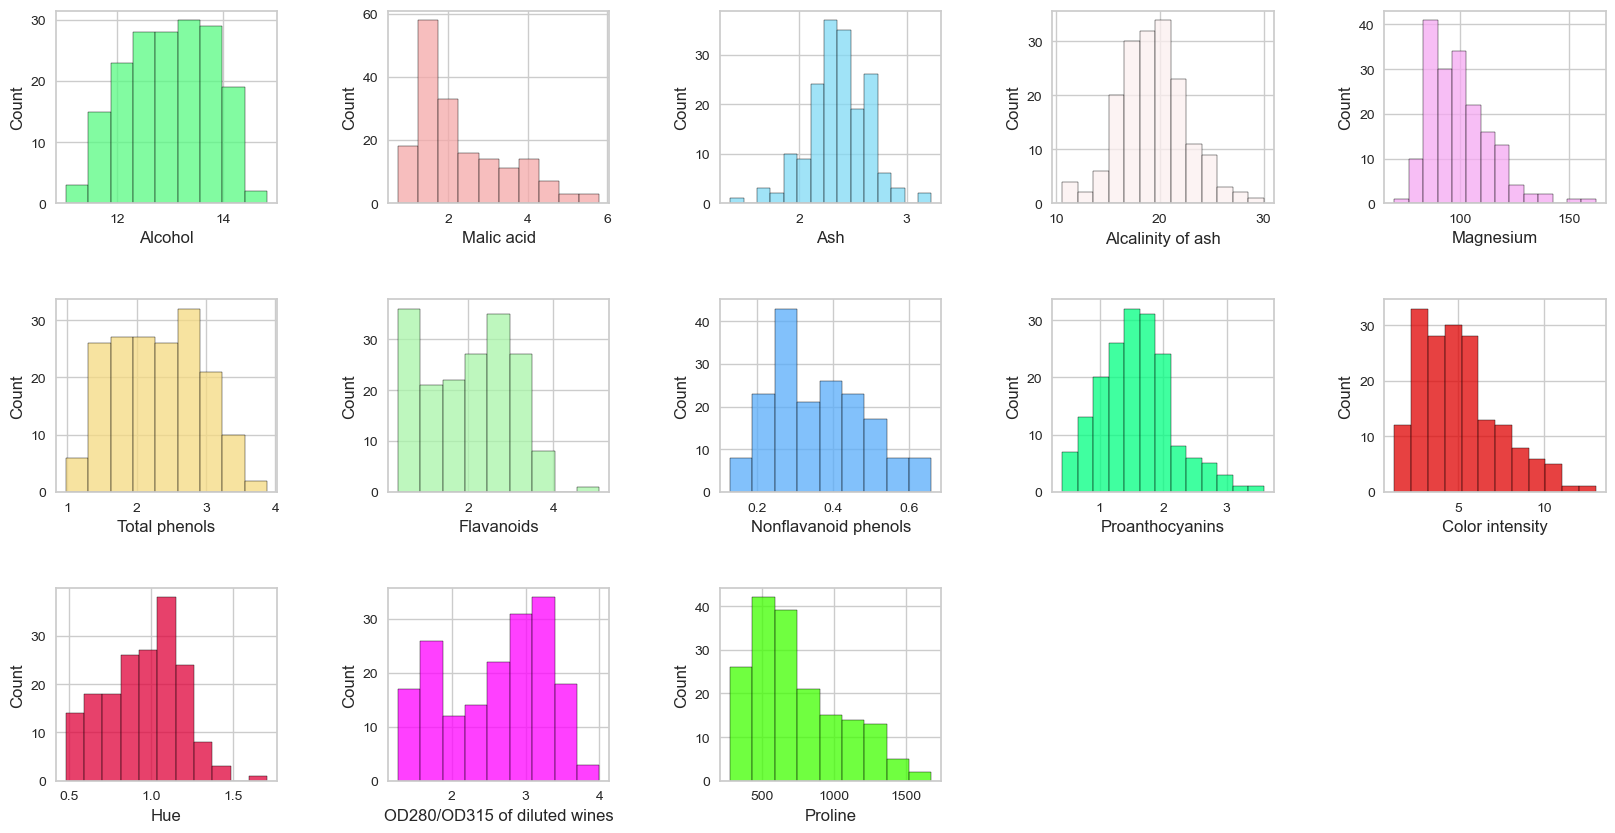

In [12]:

#print(Style.BRIGHT +'\nPruebas de Contraste de Normalidad:\n '+Style.RESET_ALL)
print('\n- Distribución de los atributos independientes\n ')
crearhistograma(data,features)
sns.set_theme(style="white", rc=None)

> En los histogramas podemos observar que todos los atributos son numéricos continuos. 

Podemos ver la distribución de cada predictor, algunos de ellos parecen cercanos a una distribución normal, podemos comprobar si siguen una distribución normal utilizando la Prueba de Normalidad de Shapiro-Wilk. Nuestra Hipótesis es:

- H₀: Los datos se distribuyen normalmente.
- H₁: Los datos no se distribuyen normalmente.  

Crearemos una función que compruebe la distribución para cada objetivo:

In [13]:
print('\n- Prueba Shapiro-Wilk:\n ')
crearShapiro(data,features)
sns.set_theme(style="white", rc=None)


- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,Alcohol,0.982446,0.025065,Not Probably Gaussian
1,Malic acid,0.890185,0.000000,Not Probably Gaussian
2,Ash,0.984065,0.041134,Not Probably Gaussian
3,Alcalinity of ash,0.990177,0.263872,Probably Gaussian
4,Magnesium,0.936736,0.000000,Not Probably Gaussian
5,Total phenols,0.976806,0.004716,Not Probably Gaussian
6,Flavanoids,0.955054,0.000020,Not Probably Gaussian
7,Nonflavanoid phenols,0.963253,0.000132,Not Probably Gaussian
8,Proanthocyanins,0.979606,0.010673,Not Probably Gaussian
9,Color intensity,0.939634,0.000001,Not Probably Gaussian


> Solo obtenemos un atributo que tiene la distribución normal, el atributo **Alcalinity of ash**.


- Gráfica Quantile-Quantile:
 


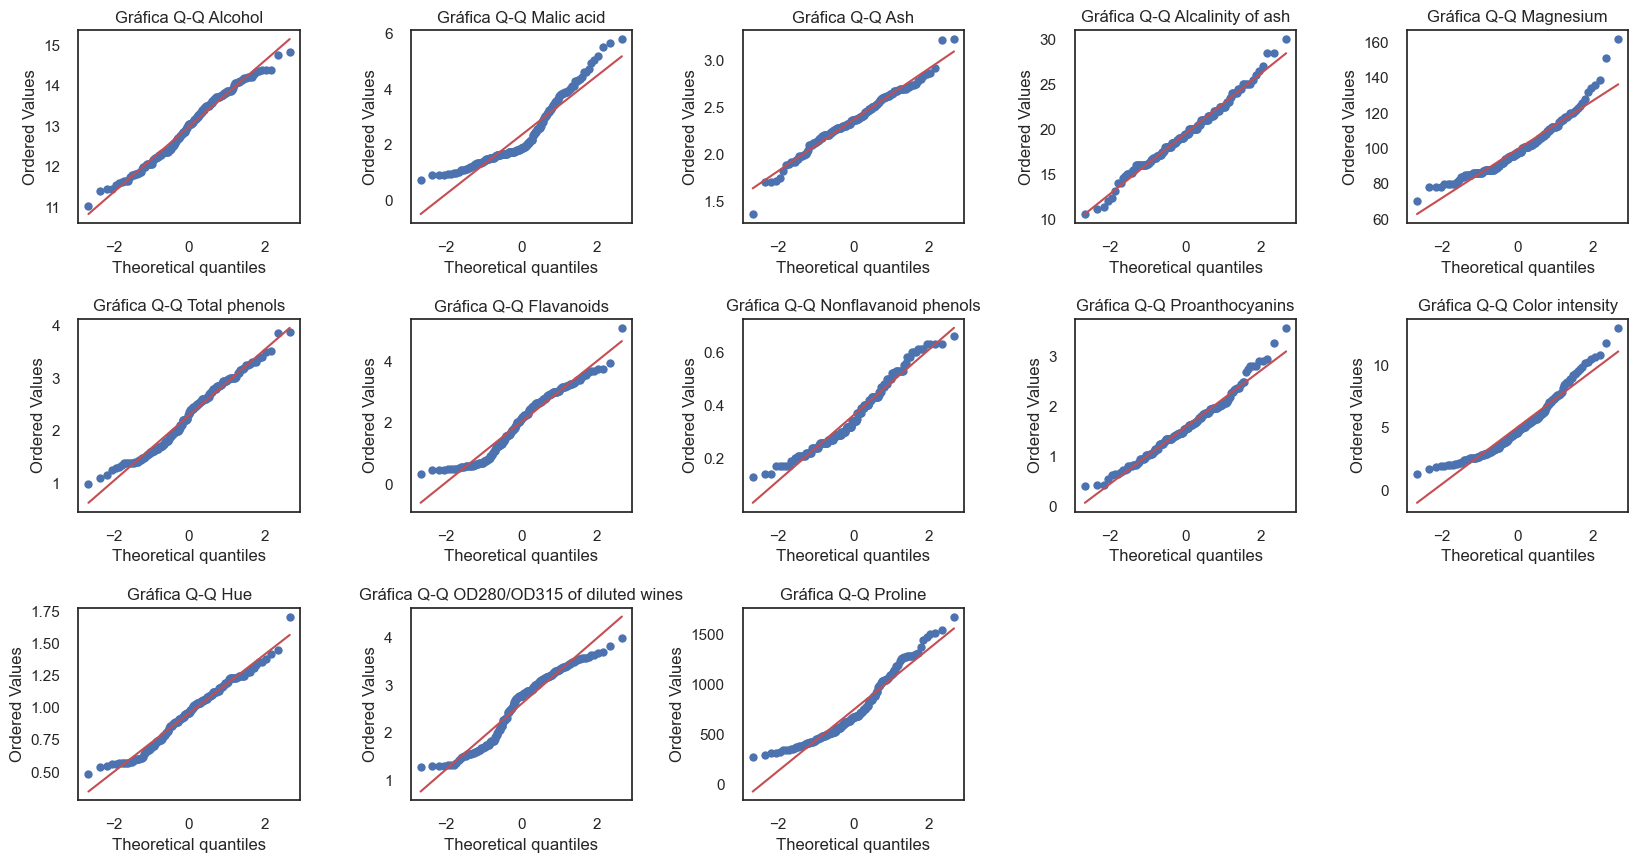

In [14]:
print('\n- Gráfica Quantile-Quantile:\n ')
crearquantile(data,features)
sns.set_theme(style="white", rc=None)

> Hemos visto que solo un atributo a pasado el Test de hipótesis, aunque observando las gráficas de Quantile-Quantile tenemos algunos atributos que se comportan bien en la linea de tendencia, por ejemplo Alcohol, ash, Alcalinity of ash, Proanthocyanins y Hue.


+ **Evaulación del coeficiente de correlación de los atributos.**

1. Analizamos todos los atributos:

In [15]:
Tabla=data[features].corr()
Coef=0.5

#Código para solo presentar los atributos que tiene un coeficiente +/- 0.7
# Crear un nuevo DataFrame vacío
filtered_df = pd.DataFrame()
numcol=Tabla.shape[1]
vcol=0
borrarindice=[]

for index, row in Tabla.iterrows():
    vcol=0
    for column in Tabla.columns:
        val=Tabla[column][index]
    # Verificar si el nombre de la columna contiene una palabra/valor númerico específico
        if (val <= -Coef) or (val >= Coef and val < 1) :
        # Agregar la columna al nuevo DataFrame
            filtered_df[column] = Tabla[column]
        else: vcol=vcol+1
    # Guardamos el índice para despues borrarlo, sí hemos recorrido todas las columnas y no
    # hemos encontrado nuestro valor
    if vcol==numcol: borrarindice.append(index)
        
# borramos aquellas filas que no hemos tenido el valor buscado.
filtered_df=filtered_df.drop(index=borrarindice,axis=0)           
        
def text_format(val):
    color = 'salmon' if (val <= -Coef) or (val >= Coef and val < 1) else 'white'
    return 'background-color: %s' % color

# Guardo la informació de las columnas que tienen una mayor correlación
features05=filtered_df.columns

filtered_df.style.applymap(text_format)


,Color intensity,Proline,Hue,Flavanoids,Proanthocyanins,OD280/OD315 of diluted wines,Total phenols,Nonflavanoid phenols,Alcohol,Malic acid
Alcohol,0.547883,0.641068,-0.075375,0.230133,0.127561,0.057417,0.284543,-0.151445,1.000000,0.099963
Malic acid,0.250053,-0.189512,-0.560854,-0.409324,-0.217975,-0.366720,-0.333512,0.291501,0.099963,1.000000
Total phenols,-0.056401,0.495839,0.432987,0.864046,0.610533,0.699566,1.000000,-0.448301,0.284543,-0.333512
Flavanoids,-0.174411,0.491180,0.543208,1.000000,0.650254,0.786372,0.864046,-0.536326,0.230133,-0.409324
Nonflavanoid phenols,0.140192,-0.308886,-0.261709,-0.536326,-0.363268,-0.501859,-0.448301,1.000000,-0.151445,0.291501
Proanthocyanins,-0.027112,0.325731,0.294397,0.650254,1.000000,0.513415,0.610533,-0.363268,0.127561,-0.217975
Color intensity,1.000000,0.315632,-0.522615,-0.174411,-0.027112,-0.435744,-0.056401,0.140192,0.547883,0.250053
Hue,-0.522615,0.234879,1.000000,0.543208,0.294397,0.567395,0.432987,-0.261709,-0.075375,-0.560854
OD280/OD315 of diluted wines,-0.435744,0.306031,0.567395,0.786372,0.513415,1.000000,0.699566,-0.501859,0.057417,-0.366720
Proline,0.315632,1.000000,0.234879,0.491180,0.325731,0.306031,0.495839,-0.308886,0.641068,-0.189512


|Coeficiente de correlación de Karl Pearson|  
| -: |    
    
| Valor | Significado |   
| :- | -: |  
| 0,01 a 0,19| Correlación positiva muy baja |   
| 0,2 a 0,39 | Correlación positiva baja |   
| 0,4 a 0,69 | Correlación positiva moderada |   
| 0,7 a 0,89 | Correlación positiva alta |   


> La tabla anterior nos permite observar aquellos atributos que tienen un buen coeficiente de correlación. Resaltado en un color Salmón se observa esa combinación entre los diferentes atributos ***+/- 0.5***.    
Entre los atributos independientes observamos que algunos atributos tienen una coeficiente de correlación muy fuerte, una tasa del ***86%***.



2. Analizamos nuestro atriburo predictor **Class Distribution**.   
    2.1 Convertimos nuestro atributo target a atributo categorico.

In [16]:
#Veamos la frecuencia del objetivo variable.
##Convertir variable a categórica.
data.target=data[target].astype('int64').astype('category')

#Frequencia.
frecuencia=data['Class Distribution'].value_counts()

frecuencia


2    71
1    58
3    48
Name: Class Distribution, dtype: int64

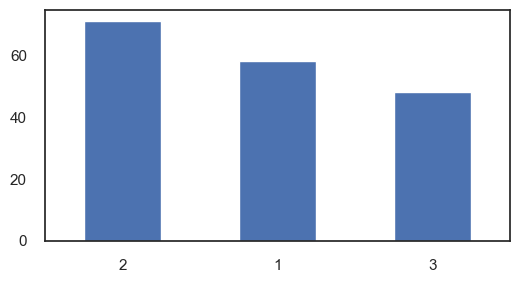

In [17]:
#Graficamos la frecuencia
plt.figure(figsize=(6,3))
frecuencia.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()


+ **Preparación de Atributos.**

Para el primer ejercicio, trabajaremos con el DataSet Original, buscaremos los atributos independientes con más coeficiente de correlación con el atributo dependiente.  
Dejamos para el último ejercicio la normalización de variables.


In [18]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            print(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df

|Coeficiente de correlación de Karl Pearson|  
| -: |    
    
| Valor | Significado |   
| :- | -: |  
| 0,01 a 0,19| Correlación positiva muy baja |   
| 0,2 a 0,39 | Correlación positiva baja |   
| 0,4 a 0,69 | Correlación positiva moderada |   
| 0,7 a 0,89 | Correlación positiva alta |   


In [19]:
# Tienen más coeficiente de relación con uno de los atributos
corrdat = data.corr()
threshold = 0.7
corr_value = getCorrelatedFeature(corrdat['Class Distribution'],threshold)

Class Distribution
Total phenols
Flavanoids
OD280/OD315 of diluted wines


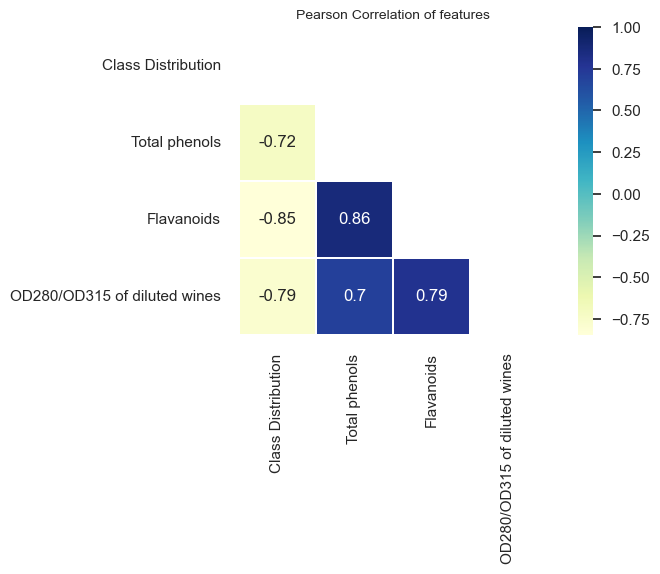

In [20]:
# corr matrix 
CD = data[corr_value.index]
plt.figure(figsize=(8,4))
colormap = plt.cm.YlGnBu

matrix = np.triu(CD.astype(float).corr())
plt.title('Pearson Correlation of features', y=1, size = 10)
sns.heatmap(CD.astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = colormap, 
           linecolor = 'white', annot = True, mask = matrix)
plt.show()

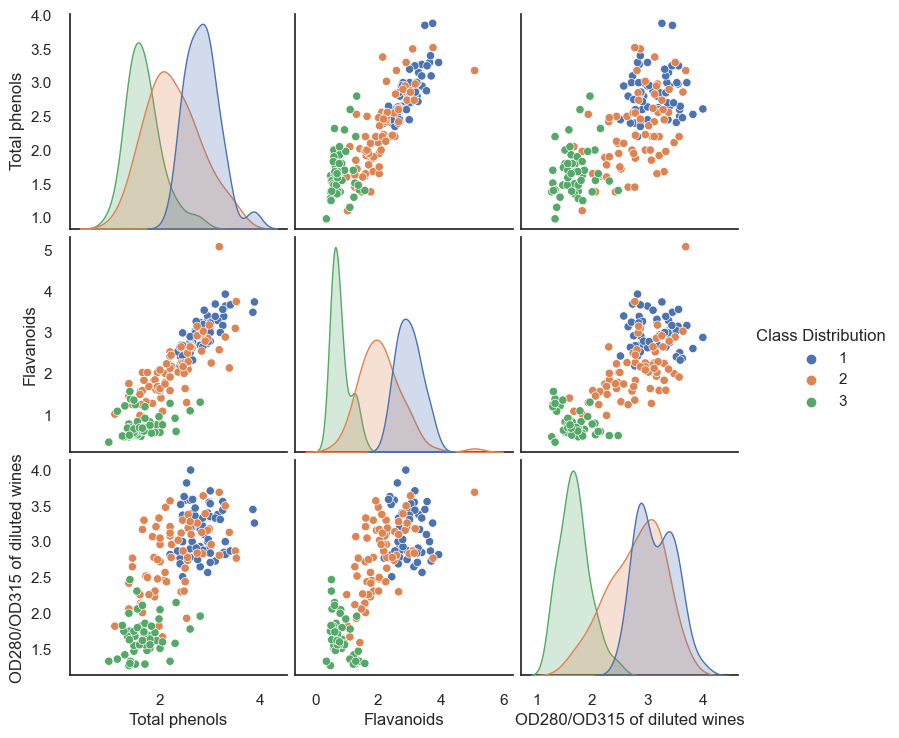

In [21]:
sns.pairplot(CD,hue='Class Distribution', palette='deep')

In [22]:
print('\n- Prueba Shapiro-Wilk:\n ')
crearShapiro(CD,CD.columns)
sns.set_theme(style="white", rc=None)


- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,Class Distribution,0.804697,0.000000,Not Probably Gaussian
1,Total phenols,0.976806,0.004716,Not Probably Gaussian
2,Flavanoids,0.955054,0.000020,Not Probably Gaussian
3,OD280/OD315 of diluted wines,0.942479,0.000001,Not Probably Gaussian



- Gráfica Quantile-Quantile:
 


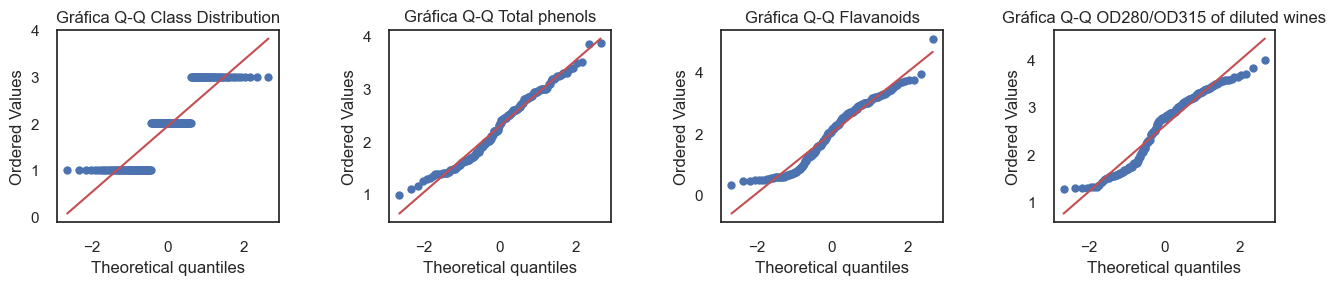

In [23]:
print('\n- Gráfica Quantile-Quantile:\n ')
crearquantile(CD,CD.columns)
sns.set_theme(style="white", rc=None)

+ **Determinar el Train y Test.**  
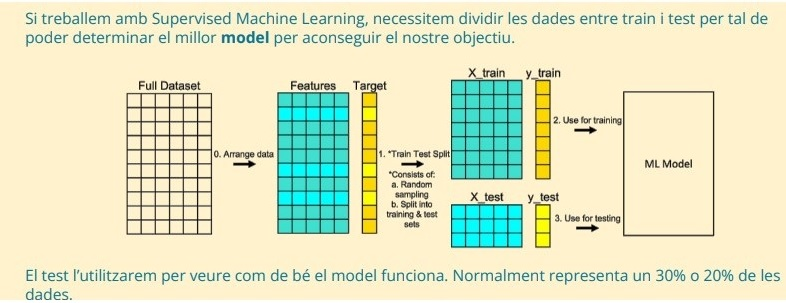

   
****Utilizo los siguientes atributos para realizar el Train/Test.****  
Creamos nuestro dataset de Train y Test:    
- features = Aquellos atributos que tienen una coeficiente de correlación >= +/-0.07
- target = El atributo dependiente Class Distribution.  




In [24]:
# Creamos nuestro dataset de Train y Test
# Vamos a utilizar solo los atributos independientes que tienen un coeficiente
# de correlación con el atributo dependiente de >0.37

df00 = data.copy()
features = ['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols']

target = ['Class Distribution']

#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7.
#una distribución normal
Semilla=42
x = df00.loc[:, features]
#target 
y = df00.loc[:, ['Class Distribution']].values
    
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, 
                                                    random_state = Semilla) 
# random_state = 42, siempre coge la misma partición


print(Style.BRIGHT +'Estudio del Conjunto de Datos:\n\nResultado:\n '+Style.RESET_ALL) 
print(Fore.GREEN+'Conjunto de Datos Train y Test (x e y):'+Style.RESET_ALL)
print(f'- Total de Registros y atributos, X_train: {X_train.shape}')
print(f'- Total de Registros y atributos, X_test: {X_test.shape}')
print(f'- Total de Registros y atributos, y_train: {y_train.shape}')
print(f'- Total de Registros y atributos, y_test: {y_test.shape}')




Estudio del Conjunto de Datos:

Resultado:
 
Conjunto de Datos Train y Test (x e y):
- Total de Registros y atributos, X_train: (141, 3)
- Total de Registros y atributos, X_test: (36, 3)
- Total de Registros y atributos, y_train: (141, 1)
- Total de Registros y atributos, y_test: (36, 1)


************

### <font color='#d50283'>- Exercici 1</font>
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

+ **Funciones utilizadas en este ejercicio:**

In [25]:
# Comprobación de predicción y precisión
#Añadir valores ejercicio 2
dfmetricas=[]
dfmetricas = pd.DataFrame(dfmetricas,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k'])

Vmodelo=[]
Vtitulo=[]
Vprediciones=[]

In [26]:
# Guardar información


def metricas(titulo,modelo,test,train,df,ytrain,ytest,prediccion):
    
    r2 = round(r2_score(ytest, prediccion),2)
    mse = round(mean_squared_error(ytest, prediccion),2)
    rmse = round(math.sqrt(mean_squared_error(ytest, prediccion)),2)
    mae = round(mean_absolute_error(ytest, prediccion),2)
    accuracy = round(metrics.accuracy_score(ytest, prediccion),2)
        
    scores = cross_val_score(modelo, train, ytrain, cv=5)
    accuracy_CVS = "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)
    
    
    precision = np.mean(metrics.precision_score(ytest, prediccion,average=None)).round(2)
    recall =np.mean(metrics.recall_score(ytest, prediccion,average=None)).round(2)
    f1_score =np.mean(metrics.f1_score(ytest, prediccion,average=None)).round(2)
    Cohen_k = cohen_kappa_score(ytest, prediccion).round(2)
    #ROC AUC
    y_pred = modelo.predict_proba(test)
    ROCAUC_mic=roc_auc_score(ytest,y_pred, multi_class='ovr',average='micro').round(2)
    ROCAUC_mac=roc_auc_score(ytest,y_pred, multi_class='ovr',average='macro').round(2)
    
    #Guardar
    df.append([titulo, r2, "{} %".format(round(r2*100,2)),mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROCAUC_mic,ROCAUC_mac,Cohen_k])
    #print(df)
    return(df)

In [27]:
# visualicemos los errores de este árbol en una matriz de confusión
def grafica_matrix (ytest,ypred):
    cf_matrix = confusion_matrix(ytest, ypred)
    print('\n\nMatriz de Confusión:\n')
    #print(cf_matrix)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.xaxis.set_label_position('top')
    sns.heatmap(cf_matrix, annot=True);
    plt.tight_layout()
    plt.title('Matriz de confusion', y=1.1)
    plt.ylabel('Valor Actual')
    plt.xlabel('Valor predicho')
    plt.Text(1.5,257.44,'Predicción')
    plt.show()

In [28]:
def grafica_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, is_fitted=True)# ,encoder={1: '1',2: '2', 3: '3'})
                                                       
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

+ **Estudio de diferentes Estimadores:**

+ **1.1 Decision Tree Classification**   
<font color='##08a22a'></font>[Tutorial arbres de classificació](<https://www.datacamp.com/tutorial/decision-tree-classification-python>)      
<font color='##08a22a'></font>[Ciencia del Dato](<https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html>)   
<font color='##08a22a'></font>[Video Explicación.](<https://www.youtube.com/watch?v=DyreLB9Srjo>)


In [29]:
# Create Decision Tree classifer object
clf_dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dtc = clf_dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc = clf_dtc.predict(X_test)

In [30]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,test,train,df,ytrain,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test
Vprediciones.append(y_pred_dtc)
dfvalor=[]
dfvalor=metricas('Decision Tree Classification, Ej.1',clf_dtc,X_test,X_train,dfvalor,y_train,y_test,y_pred_dtc)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(clf_dtc)
Vtitulo.append('Decision Tree Classification, Ej.1')

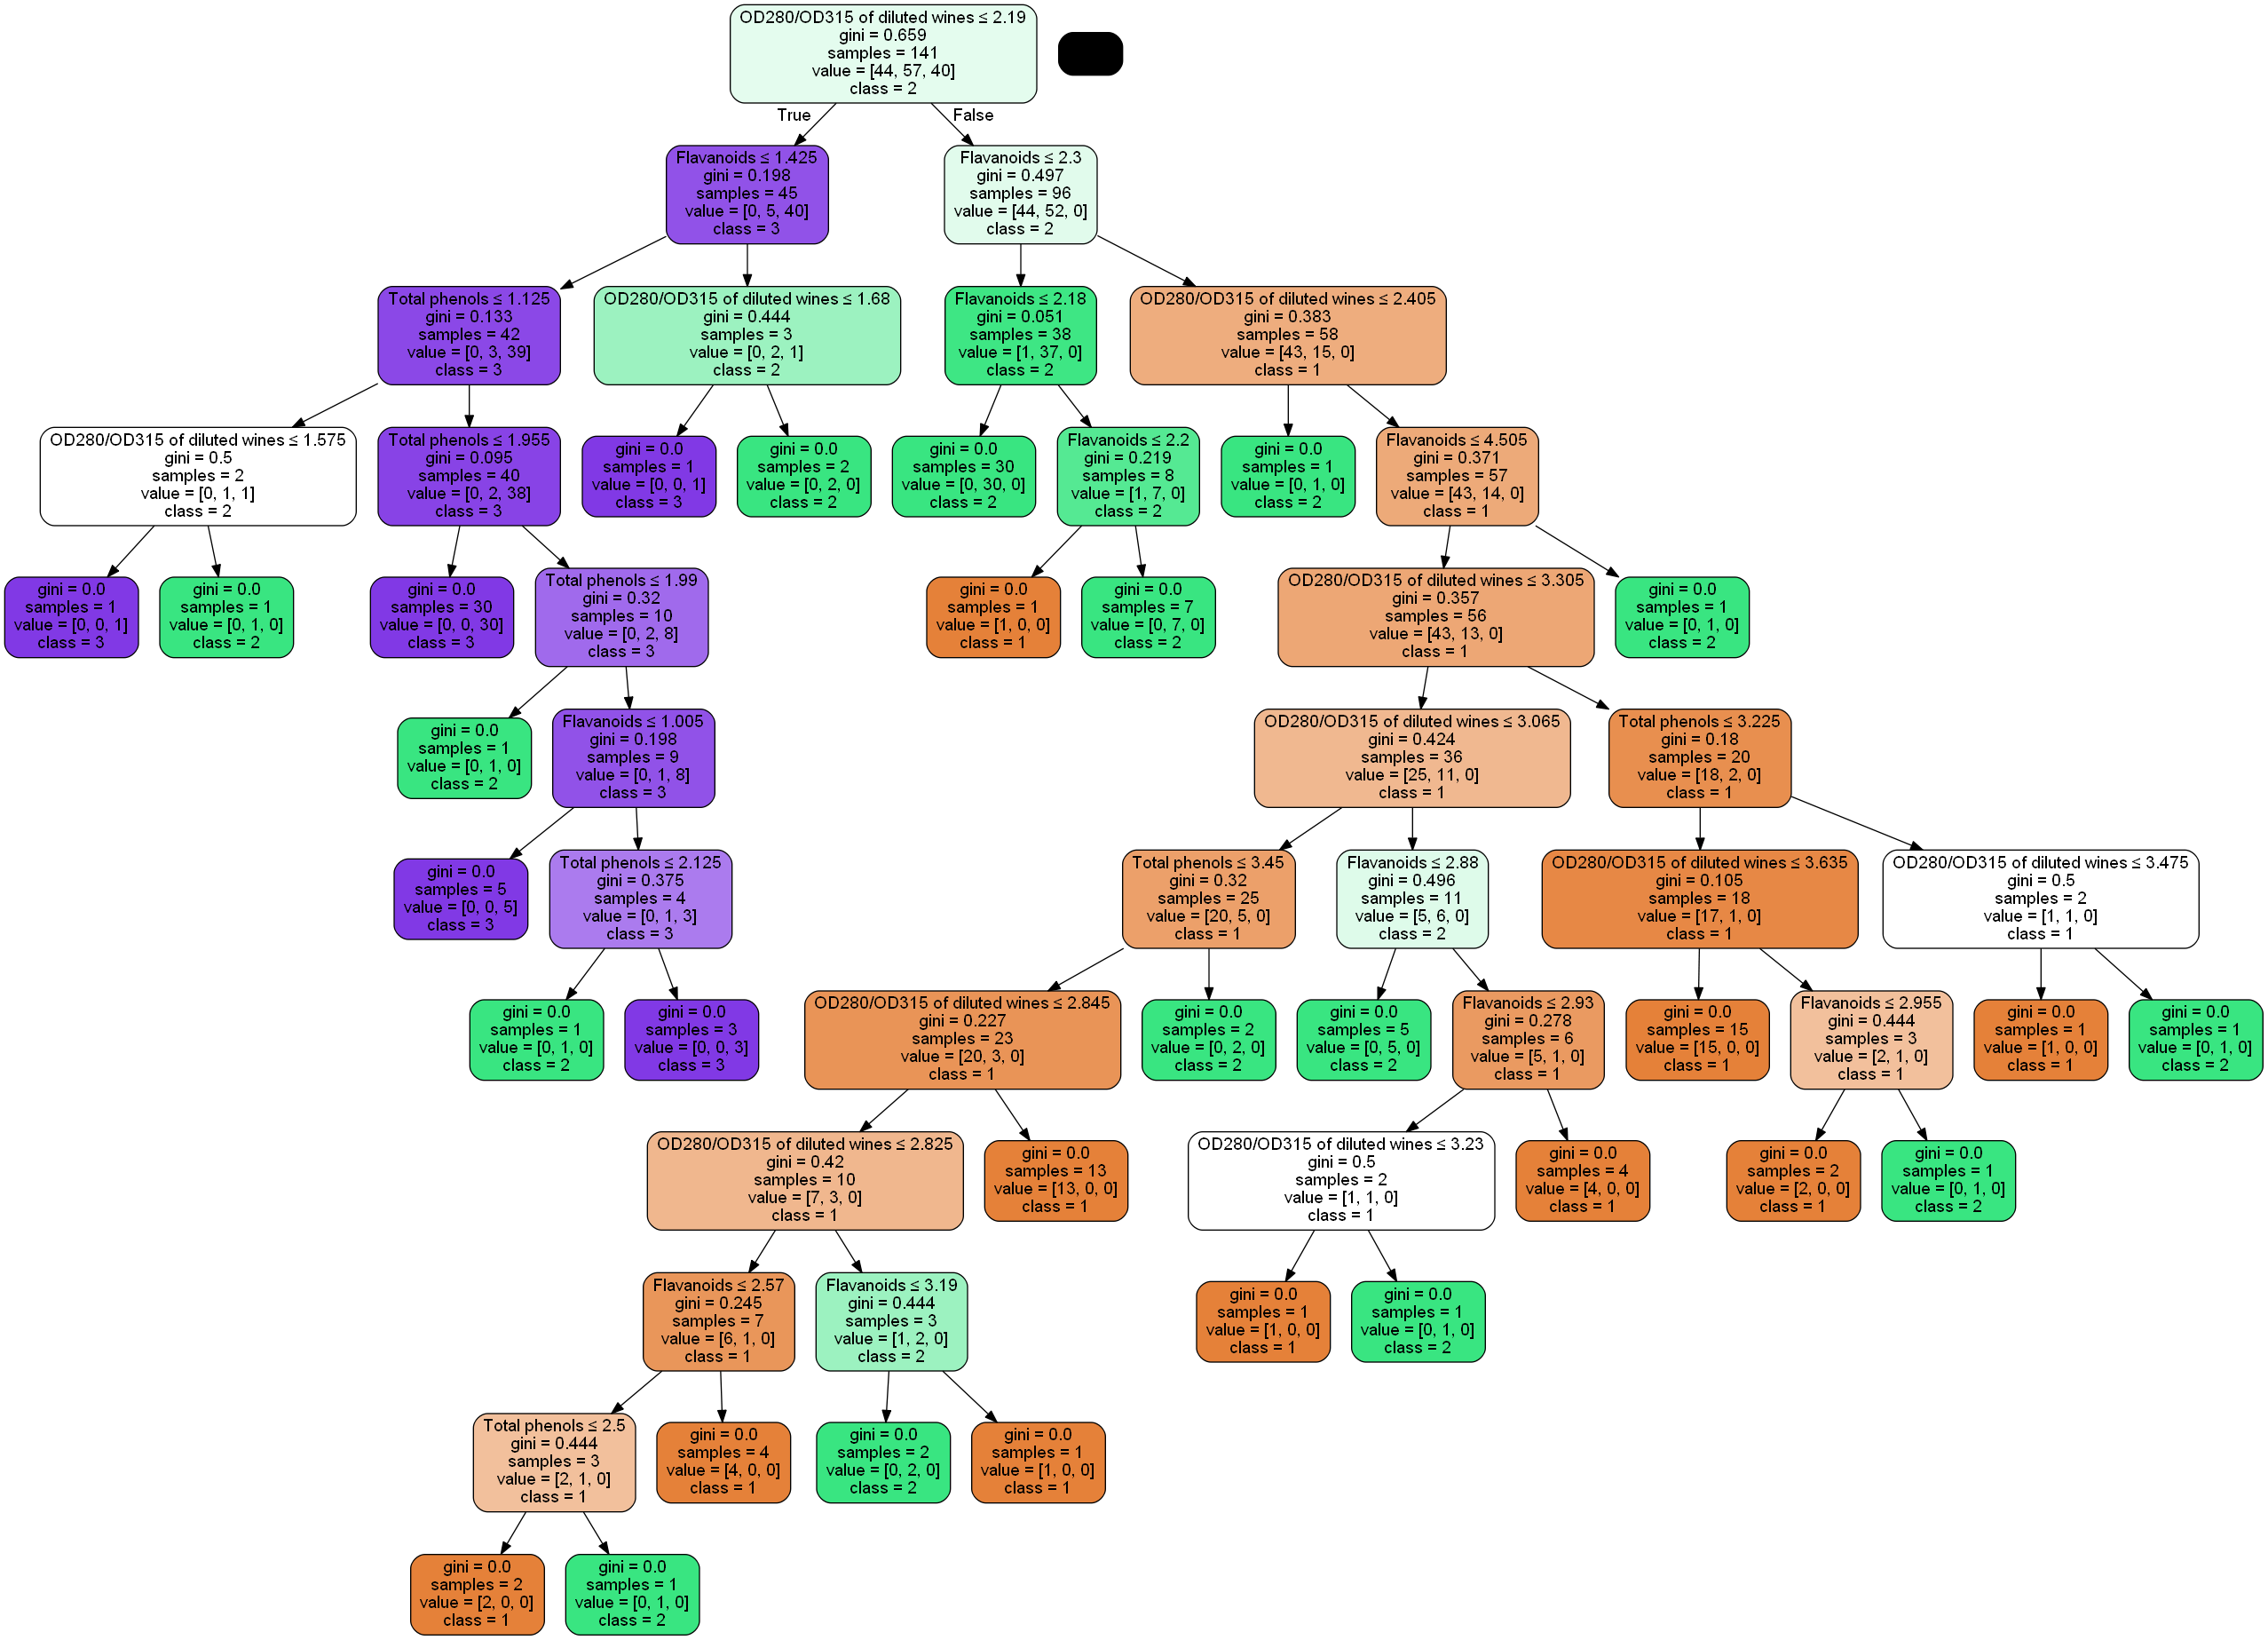

In [31]:
#Visualización de árboles de decisión
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from six import StringIO
# código de abajo para que sepa donde esta el ejecutable graphviz, da error si lo suprimimos la linea
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = StringIO()
export_graphviz(clf_dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vino.png')
Image(graph.create_png())

+ **1.1.1 Evaluación del modelo Decision Tree Classification**   
<font color='##08a22a'></font>[Explicación ROC](<https://www.youtube.com/watch?v=AcbbkCL0dlo>)      



In [32]:
print('\n\nMétricas:')
display(dfmetricas[dfmetricas['Tipo Clasificación']=='Decision Tree Classification, Ej.1'])
print('\n')



Métricas:


,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"Decision Tree Classification, Ej.1",0.43,43.0 %,0.33,0.58,0.33,0.67,0.76 (+/- 0.14),0.67,0.66,0.67,0.75,0.74,0.48




Matriz de Confusión:



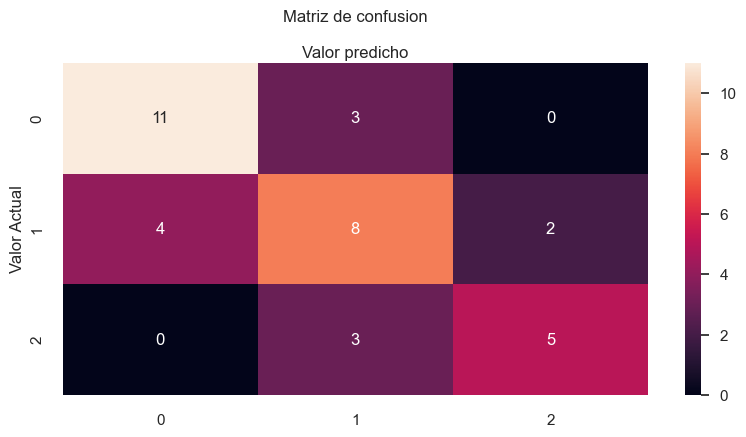

In [33]:
grafica_matrix (y_test,y_pred_dtc)

<font color='##08a22a'>Curva ROC </font>[ wikipedia](<https://es.wikipedia.org/wiki/Curva_ROC#:~:text=Curvas%20ROC%20para%20pruebas%20diagn%C3%B3sticas,-Diferentes%20curvas%20ROC&text=Esta%20%C3%A1rea%20posee%20un%20valor,prueba%20sin%20capacidad%20discriminatoria%20diagn%C3%B3stica.>)    
A modo de guía para interpretar las curvas ROC se han establecido los siguientes intervalos para los valores de AUC:

|Interpretar las curvas ROC (Valores de AUC)|  
| -: |    
    
| Valor | Significado |   
| :- | -: |  
| 0,05| Es como lanzar una moneda |   
| 0,5 a 0,6 | Test malo |   
| 0,6 a 0,75 | Test regular |   
| 0,75 a 0,9 | Test bueno |  
| 0,9 a 0,97 | Test muy bueno | 
| 0,97 a 1 | Test excelente | 




Gráfica de curva ROC:
 


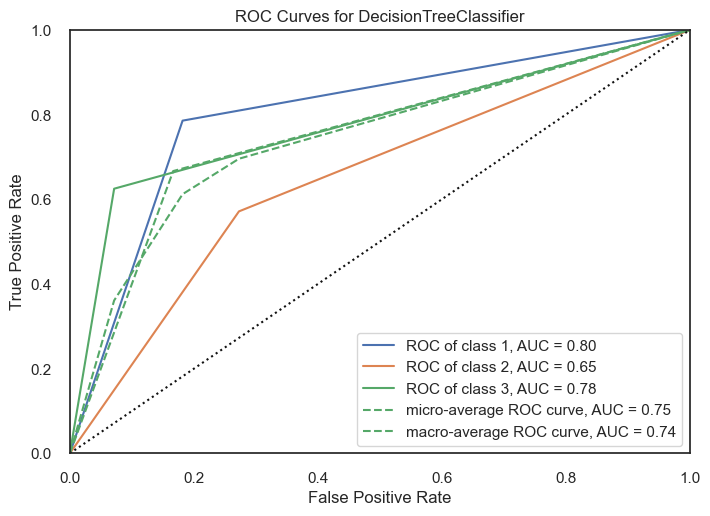

In [34]:
# from yellowbrick.classifier import ROCAUC
# https://www.youtube.com/watch?v=AcbbkCL0dlo
# https://datascience.stackexchange.com/questions/87344/interpreting-vertical-and-horizontal-parts-of-roc-curve/87363#87363
print ('\n\nGráfica de curva ROC:\n ')
grafica_ROC_curve(clf_dtc,X_train, y_train, X_test, y_test)
plt.show()

Según la interpretación de la tabla anterior, obtendriamos un Test regular con este modelo, aunque las lineas de las clases son muy rectas.

<font color='##08a22a'>Coeficiente kappa de Cohen </font>[ wikipedia](<https://es.wikipedia.org/wiki/Coeficiente_kappa_de_Cohen>)    

|Interpretar Coeficiente kappa de Cohen|  
| -: |    
    
| Valor | Significado |   
| :- | -: |  
| 0,2 a 0,4 | Bajo |   
| 0,4 a 0,6 | Moderado |  
| 0,6 a 0,8 | Bueno | 
| 0,8 a 1,0 | Excelente | 


In [35]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred_dtc)
print(" Coeficiente kappa de Cohen (K = {0:0.2f})".format(cluster))

 Coeficiente kappa de Cohen (K = 0.48)


+ **1.2 Algoritmo SVM (Support Vector Machines)**   
<font color='##08a22a'></font>[Algoritme SVM](<https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python>)    
<font color='##08a22a'></font>[Video Explicativo](<https://www.youtube.com/watch?v=_lXhf_uoZGQ&t=18s>)  

In [36]:
#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf_svm.predict(X_test)

In [37]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,Probabilidad,df,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test


Vprediciones.append(y_pred_svm)
dfvalor=[]
dfvalor=metricas('Support Vector Machines, Ej.1',clf_svm,X_test,X_train,dfvalor,y_train,y_test,y_pred_svm)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(clf_svm)
Vtitulo.append('Support Vector Machines, Ej.1')

+ **1.2.1 Evaluación del modelo Algoritmo SVM (Support Vector Machines)**   


In [38]:
print('\n\nMétricas:')
display(dfmetricas[dfmetricas['Tipo Clasificación']=='Support Vector Machines, Ej.1'])
print('\n')



Métricas:


,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"Support Vector Machines, Ej.1",0.81,81.0 %,0.11,0.33,0.11,0.89,0.84 (+/- 0.15),0.89,0.9,0.89,0.95,0.95,0.83




Matriz de Confusión:



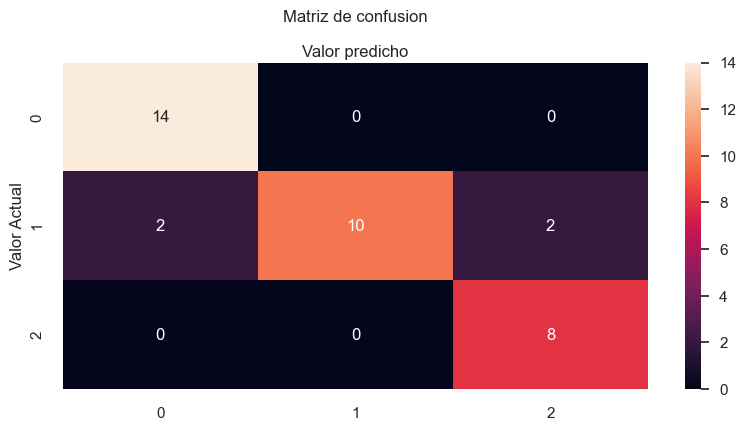

In [39]:
grafica_matrix (y_test,y_pred_svm)



Gráfica de curva ROC:
 


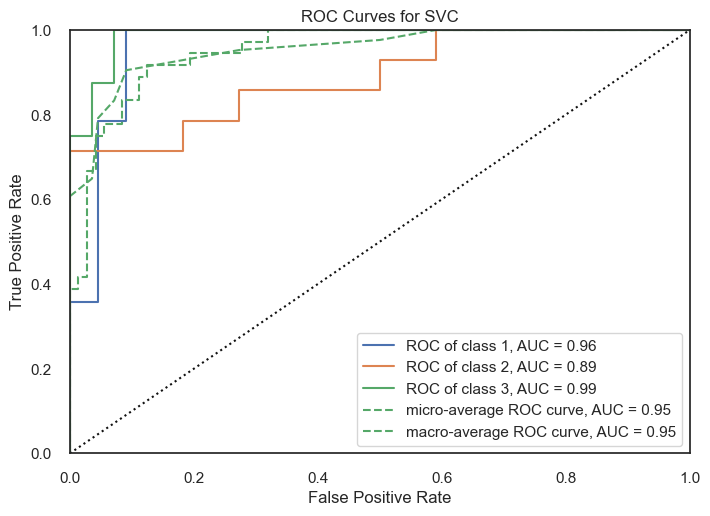

In [40]:
# from yellowbrick.classifier import ROCAUC
# https://www.youtube.com/watch?v=AcbbkCL0dlo
print ('\n\nGráfica de curva ROC:\n ')
grafica_ROC_curve(clf_svm,X_train, y_train, X_test, y_test)
plt.show()

In [41]:
cluster = cohen_kappa_score(y_test, y_pred_svm)
print(" Coeficiente kappa de Cohen (K = {0:0.2f})".format(cluster))

 Coeficiente kappa de Cohen (K = 0.83)


+ **1.3 Algoritme KNN (K-nearest Neighbors)**   
<font color='##08a22a'></font>[Algoritme KNN](<https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/>)     
<font color='##08a22a'></font>[Video Explicativo](<https://www.youtube.com/watch?v=d9Z1F04uETk>)  

In [42]:
#Create a KNN Classifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf_KNN.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_KNN = clf_KNN.predict(X_test)



In [43]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,Probabilidad,df,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test
Vprediciones.append(y_pred_KNN)
dfvalor=[]
dfvalor=metricas('K-nearest Neighbors, Ej.1',clf_KNN,X_test,X_train,dfvalor,y_train,y_test,y_pred_KNN)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(clf_KNN)
Vtitulo.append('K-nearest Neighbors, Ej.1')

+ **1.3.1 Evaluación del modelo  Algoritme KNN (K-nearest Neighbors)**   


In [44]:
print('\n\nMétricas:')
display(dfmetricas[dfmetricas['Tipo Clasificación']=='K-nearest Neighbors, Ej.1'])
print('\n')



Métricas:


,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"K-nearest Neighbors, Ej.1",0.67,67.0 %,0.19,0.44,0.19,0.81,0.84 (+/- 0.18),0.82,0.83,0.81,0.93,0.89,0.7




Matriz de Confusión:



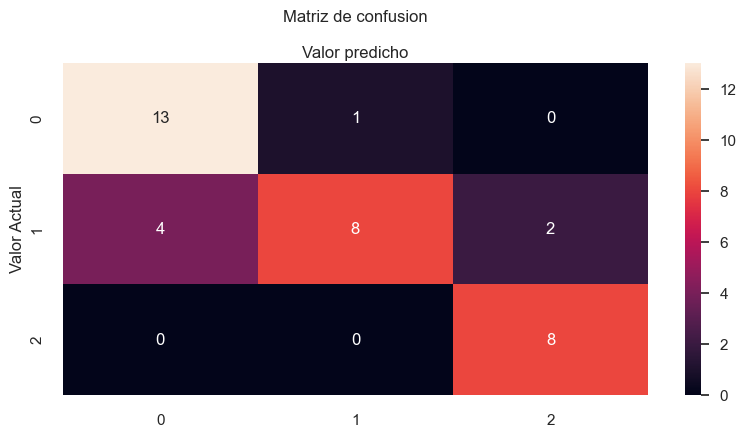

In [45]:
grafica_matrix (y_test,y_pred_KNN)



Gráfica de curva ROC:
 


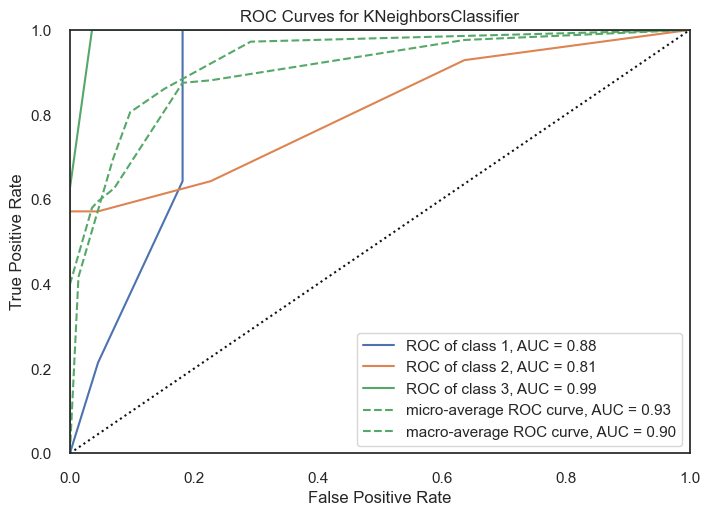

In [46]:
# from yellowbrick.classifier import ROCAUC
# https://www.youtube.com/watch?v=AcbbkCL0dlo
print ('\n\nGráfica de curva ROC:\n ')
grafica_ROC_curve(clf_KNN,X_train, y_train, X_test, y_test)
plt.show()

In [47]:
cluster = cohen_kappa_score(y_test, y_pred_KNN)
print(" Coeficiente kappa de Cohen (K = {0:0.2f})".format(cluster))

 Coeficiente kappa de Cohen (K = 0.70)


+ **1.4 Algoritme XGBoost**   
<font color='##08a22a'></font>[Algoritme XGBoost](<https://www.datacamp.com/tutorial/xgboost-in-python>)    
<font color='##08a22a'></font>[Video Explicativo](<https://www.youtube.com/watch?v=Ke4g4z1-_kw&list=PLISuMnTdVU-xNaAZM8H2oRGDlgxvHMCDJ&index=43J>)   
<font color='##08a22a'></font>[General Humai](<https://www.youtube.com/playlist?list=PLISuMnTdVU-xNaAZM8H2oRGDlgxvHMCDJ>)   

In [48]:
# Obtenemos un error
'''xgbclassifier python: Invalid classes inferred from unique values of `y`.  
   Expected: [0 1 2], got [1 2 3]
'''
# Solución
'''modifico las caracteristicas de mi atributo dependiente tanto y_train como y_test
   Solución web:
   https://stackoverflow.com/questions/72452872/valueerror-invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2
'''

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import xgboost as xgb
y_train2 = le.fit_transform(y_train)
y_test2 = le.fit_transform(y_test)


clf_XGBClassifier = xgb.XGBClassifier()
clf_XGBClassifier.fit(X_train,y_train2)

y_pred_XGBClassifier = clf_XGBClassifier.predict(X_test)
 


In [49]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,Probabilidad,df,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test
Vprediciones.append(y_pred_XGBClassifier)
dfvalor=[]
dfvalor=metricas('XGBoost Classifier, Ej.1',clf_XGBClassifier,X_test,X_train,dfvalor,y_train2,y_test2,y_pred_XGBClassifier)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(clf_XGBClassifier)
Vtitulo.append('XGBoost Classifier, Ej.1')

+ **1.4.1 Evaluación del modelo Algoritme XGBoost**   


In [50]:
print('\n\nMétricas:')
display(dfmetricas[dfmetricas['Tipo Clasificación']=='XGBoost Classifier, Ej.1'])
print('\n')



Métricas:


,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"XGBoost Classifier, Ej.1",0.48,48.0 %,0.31,0.55,0.31,0.69,0.82 (+/- 0.12),0.69,0.68,0.69,0.9,0.88,0.53




Matriz de Confusión:



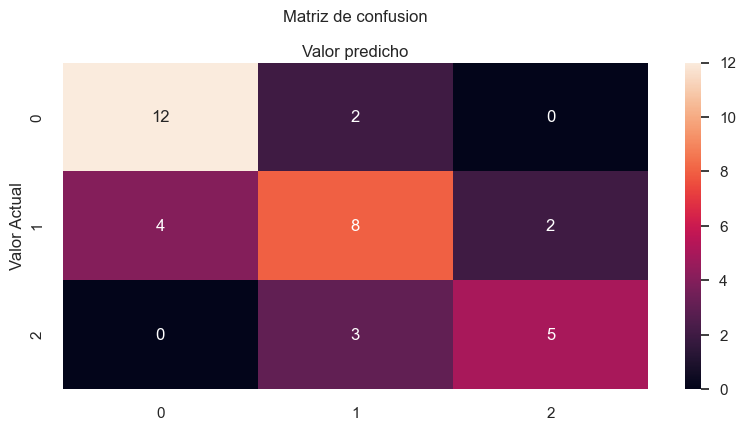

In [51]:
grafica_matrix (y_test2,y_pred_XGBClassifier)



Gráfica de curva ROC:
 


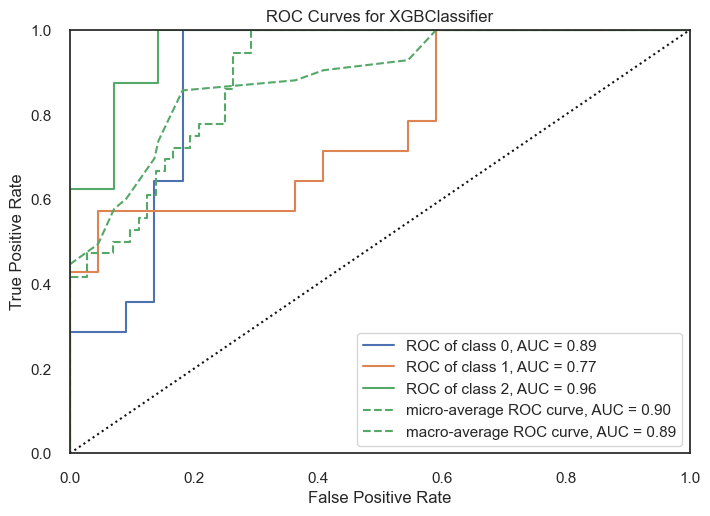

In [52]:
# from yellowbrick.classifier import ROCAUC
# https://www.youtube.com/watch?v=AcbbkCL0dlo
print ('\n\nGráfica de curva ROC:\n ')
grafica_ROC_curve(clf_XGBClassifier,X_train, y_train2, X_test, y_test2)
plt.show()

In [53]:
cluster = cohen_kappa_score(y_test2, y_pred_XGBClassifier)
print(" Coeficiente kappa de Cohen (K = {0:0.2f})".format(cluster))

 Coeficiente kappa de Cohen (K = 0.53)


+ **1.5.1 Regresión Logística**   
<font color='##08a22a'></font>[Regresión logística](<https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html>)   
<font color='##08a22a'></font>[Regressió Logística I](<https://www.datacamp.com/tutorial/understanding-logistic-regression-python>)  
<font color='##08a22a'></font>[Regressió Logística II](<https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a>)  


In [54]:
# #Create a  Regresión Logística (usando los parámetros predeterminados)
clf_lgr = LogisticRegression()

# Train the model using the training sets
clf_lgr.fit(X_train,y_train)

#Predict the response for test dataset 
y_pred_lgr=clf_lgr.predict(X_test)

In [55]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,Probabilidad,df,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test

Vprediciones.append(y_pred_lgr)
dfvalor=[]
dfvalor=metricas('Regresión Logística, Ej.1',clf_lgr,X_test,X_train,dfvalor,y_train,y_test,y_pred_lgr)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(clf_lgr)
Vtitulo.append('Regresión Logística, Ej.1')


+ **1.5.1 Evaluación del modelo Regresión Logística**   


In [56]:
print('\n\nMétricas:')
display(dfmetricas[dfmetricas['Tipo Clasificación']=='Regresión Logística, Ej.1'])
print('\n')



Métricas:


,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"Regresión Logística, Ej.1",0.67,67.0 %,0.19,0.44,0.19,0.81,0.82 (+/- 0.14),0.81,0.83,0.81,0.95,0.94,0.7




Matriz de Confusión:



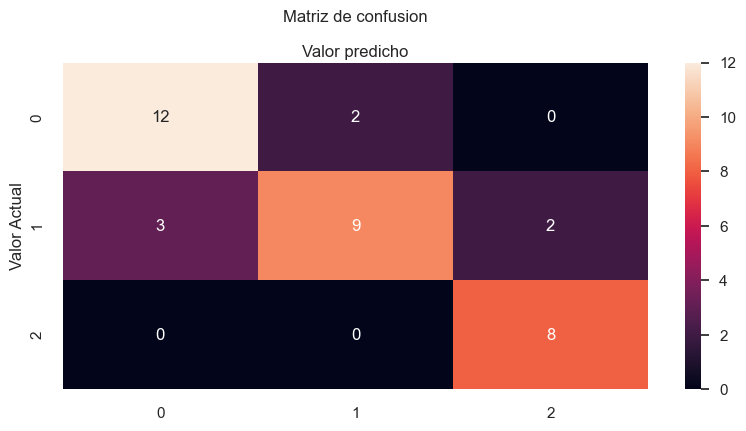

In [57]:
grafica_matrix (y_test,y_pred_lgr)



Gráfica de curva ROC:
 


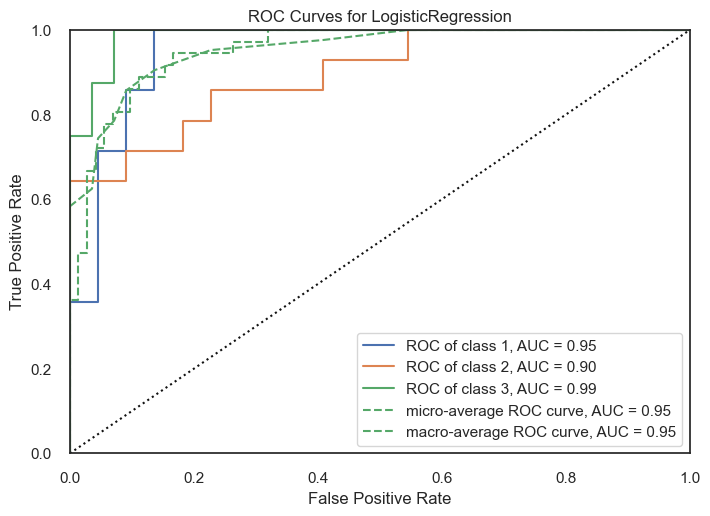

In [58]:
# from yellowbrick.classifier import ROCAUC
# https://www.youtube.com/watch?v=AcbbkCL0dlo
print ('\n\nGráfica de curva ROC:\n ')
grafica_ROC_curve(clf_lgr,X_train, y_train, X_test, y_test)
plt.show()

In [59]:
cluster = cohen_kappa_score(y_test, y_pred_lgr)
print(" Coeficiente kappa de Cohen (K = {0:0.2f})".format(cluster))

 Coeficiente kappa de Cohen (K = 0.70)


+ **1.6 Regresión Logística Múltiple**   


In [60]:
# #Create a  Regresión Logística múltiple (usando los parámetros predeterminados)
clf_lgrm = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Train the model using the training sets
clf_lgrm.fit(X_train,y_train)

#Predict the response for test dataset 
y_pred_lgrm=clf_lgrm.predict(X_test)

In [61]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,Probabilidad,df,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test

Vprediciones.append(y_pred_lgrm)

dfvalor=[]
dfvalor=metricas('Regresión Logística Múltiple, Ej.1',clf_lgrm,X_test,X_train,dfvalor,y_train,y_test,y_pred_lgrm)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(clf_lgrm)
Vtitulo.append('Regresión Logística Múltiple, Ej.1')

+ **1.6.1 Evaluación del modelo Regresión Logística Múltiple.**   


In [62]:
print('\n\nMétricas:')
display(dfmetricas[dfmetricas['Tipo Clasificación']=='Regresión Logística Múltiple, Ej.1'])
print('\n')



Métricas:


,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"Regresión Logística Múltiple, Ej.1",0.67,67.0 %,0.19,0.44,0.19,0.81,0.82 (+/- 0.14),0.81,0.83,0.81,0.95,0.94,0.7




Matriz de Confusión:



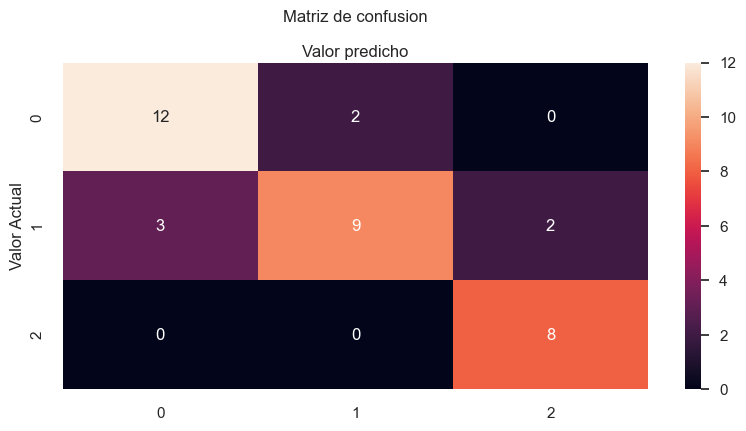

In [63]:
grafica_matrix (y_test,y_pred_lgrm)



Gráfica de curva ROC:
 


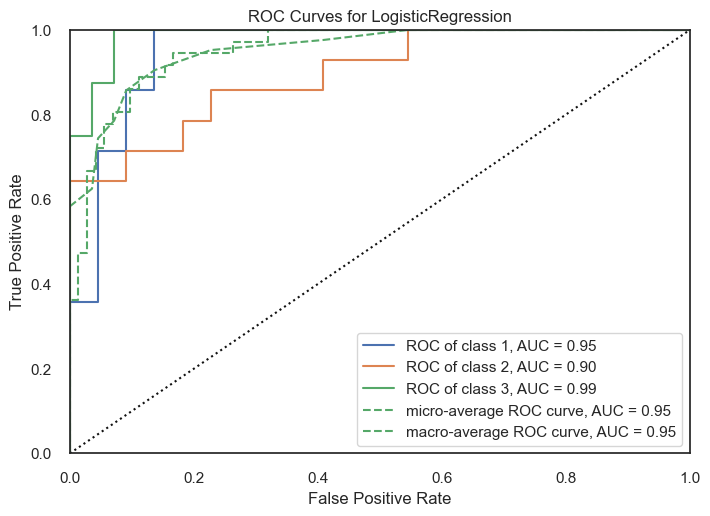

In [64]:
# from yellowbrick.classifier import ROCAUC
# https://www.youtube.com/watch?v=AcbbkCL0dlo
print ('\n\nGráfica de curva ROC:\n ')
grafica_ROC_curve(clf_lgrm,X_train, y_train, X_test, y_test)
plt.show()

In [65]:
cluster = cohen_kappa_score(y_test, y_pred_lgrm)
print(" Coeficiente kappa de Cohen (K = {0:0.2f})".format(cluster))

 Coeficiente kappa de Cohen (K = 0.70)


Realizamos diferentes métodos de clasificación sin profundizar en los posibles ajustes de los mismo para mejorar el rendimiento de ellos.  Está parte del ajuste lo dejamos para el ejercicio 3.

************

### <font color='#d50283'>- Exercici 2</font>
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

+ **Funciones utilizadas en este ejercicio:**

In [66]:
def Setconfusion_matrix(titulo,ytest,ypred):
    print('\n\nMatriz de Confusión:\n')
    y_cambio = ytest
    fig, axes = plt.subplots(3, 2, figsize=(20, 20))
    fontsize=15

        
   #for idx, (col, ax) in enumerate(zip(ypred, axes.flatten())):
            
    for idx, ax in enumerate(axes.flat):
        if Vtitulo[idx] not in ['XGBoost Classifier, Ej.1']:
            y_cambio = ytest
            label = None
        else: 
            y_cambio = le.fit_transform(y_cambio)
            label =None
 
        cf_matrix = confusion_matrix(y_cambio, ypred[idx], labels=label)
        ax.xaxis.set_label_position('top')
        sns.heatmap(cf_matrix, annot=True, ax = ax, annot_kws = {'size':25})
        ax.set_title(Vtitulo[idx], fontsize=20)
        ax.set_ylabel('Valor Actual', fontsize=fontsize)
        ax.set_xlabel('Valor predicho', fontsize=fontsize)
        
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]    
        
    #plt.text(1.5,257.44,'Predicción', fontsize=fontsize)    
    fig.tight_layout()
    plt.show()    
        




In [67]:
def Set_ROC_curve(titulo,model, xtrain, ytrain, xtest, ytest):

    y_trainxgb = le.fit_transform(y_train)
    y_testxgb = le.fit_transform(y_test)
    
    print ('\n\nGráfica de curva ROC:\n ')

    fig, axes = plt.subplots(3, 2, figsize=(20, 20))
    fontsize=20
        
    for idx, (col, ax) in enumerate(zip(ytest, axes.flatten())):
        visualizer = ROCAUC(model[idx], is_fitted=True, ax=ax, fontsize=20 )# ,encoder={1: '1',2: '2',3: '3'}) 
                                
        ax.set_title(titulo[idx],fontsize=40)
        
        if titulo[idx] not in 'XGB':
            visualizer.fit(xtrain, ytrain)
            visualizer.score(xtest, ytest)
            visualizer.finalize()
        else:
            visualizer.fit(xtrain, y_trainxgb)
            visualizer.score(xtest, y_testxgb)
            visualizer.finalize()
            
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]    
        
   
    #fig.tight_layout()
    visualizer.poof()
    visualizer.show()
    return visualizer

+ **Estudio de las Métricas obtenidas en el ejercicio anterior de cada uno de los estimadores:**

Los diferentes análisis de los métodos utilizados en el ejercicio 1, tienen asociado la matrix de confusión y la gráfica de ROC AUC.  

+ **2.1 Tabla de Análisis de Métricas.**

In [68]:
#dfmetricas.set_index('Tipo Clasificación', inplace=True)
#dfmetricas.reset_index()
dfaccuracy = dfmetricas.sort_values('accuracy',ascending=False)
dfaccuracy

,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"Support Vector Machines, Ej.1",0.81,81.0 %,0.11,0.33,0.11,0.89,0.84 (+/- 0.15),0.89,0.90,0.89,0.95,0.95,0.83
0,"K-nearest Neighbors, Ej.1",0.67,67.0 %,0.19,0.44,0.19,0.81,0.84 (+/- 0.18),0.82,0.83,0.81,0.93,0.89,0.70
0,"Regresión Logística, Ej.1",0.67,67.0 %,0.19,0.44,0.19,0.81,0.82 (+/- 0.14),0.81,0.83,0.81,0.95,0.94,0.70
0,"Regresión Logística Múltiple, Ej.1",0.67,67.0 %,0.19,0.44,0.19,0.81,0.82 (+/- 0.14),0.81,0.83,0.81,0.95,0.94,0.70
0,"XGBoost Classifier, Ej.1",0.48,48.0 %,0.31,0.55,0.31,0.69,0.82 (+/- 0.12),0.69,0.68,0.69,0.90,0.88,0.53
0,"Decision Tree Classification, Ej.1",0.43,43.0 %,0.33,0.58,0.33,0.67,0.76 (+/- 0.14),0.67,0.66,0.67,0.75,0.74,0.48


DataSet de métricas obtenidas a lo largo del ejercicio 1, ordenado por el atributo ***accuracy***.  Hemos obtenido tambien el atributo ***accuracy_CVS*** (cross_val_score). 

+ **2.2 Gráfica de Métricas.**

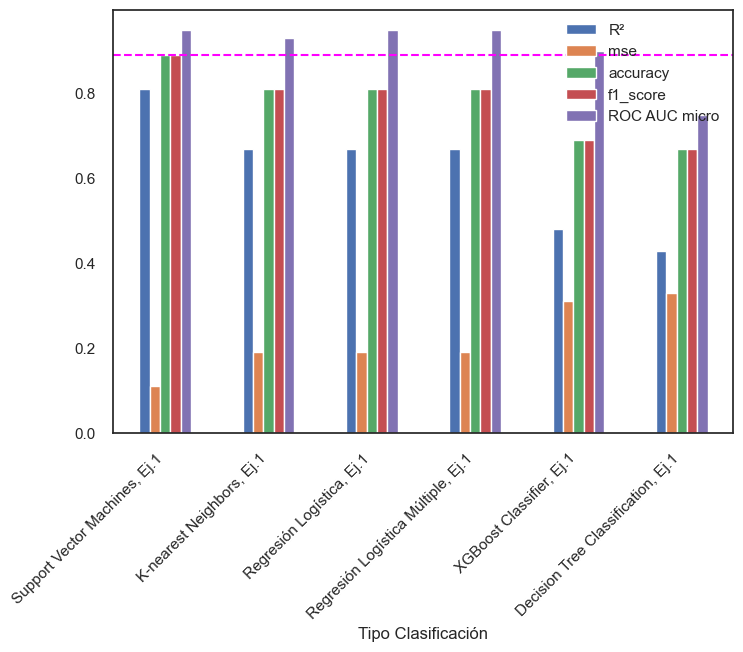

In [69]:
dfmtc=dfaccuracy[['Tipo Clasificación','R²','mse','accuracy','f1_score','ROC AUC micro']]
dfmtc.set_index('Tipo Clasificación', inplace=True)
dfmtc.plot.bar()
plt.axhline(y = dfmtc['accuracy'].max(), color = "#FF00FF", linestyle = '--')
plt.xticks(rotation=45,ha='right')
plt.show()

+ **2.3 Confusión Matrix.**



Matriz de Confusión:



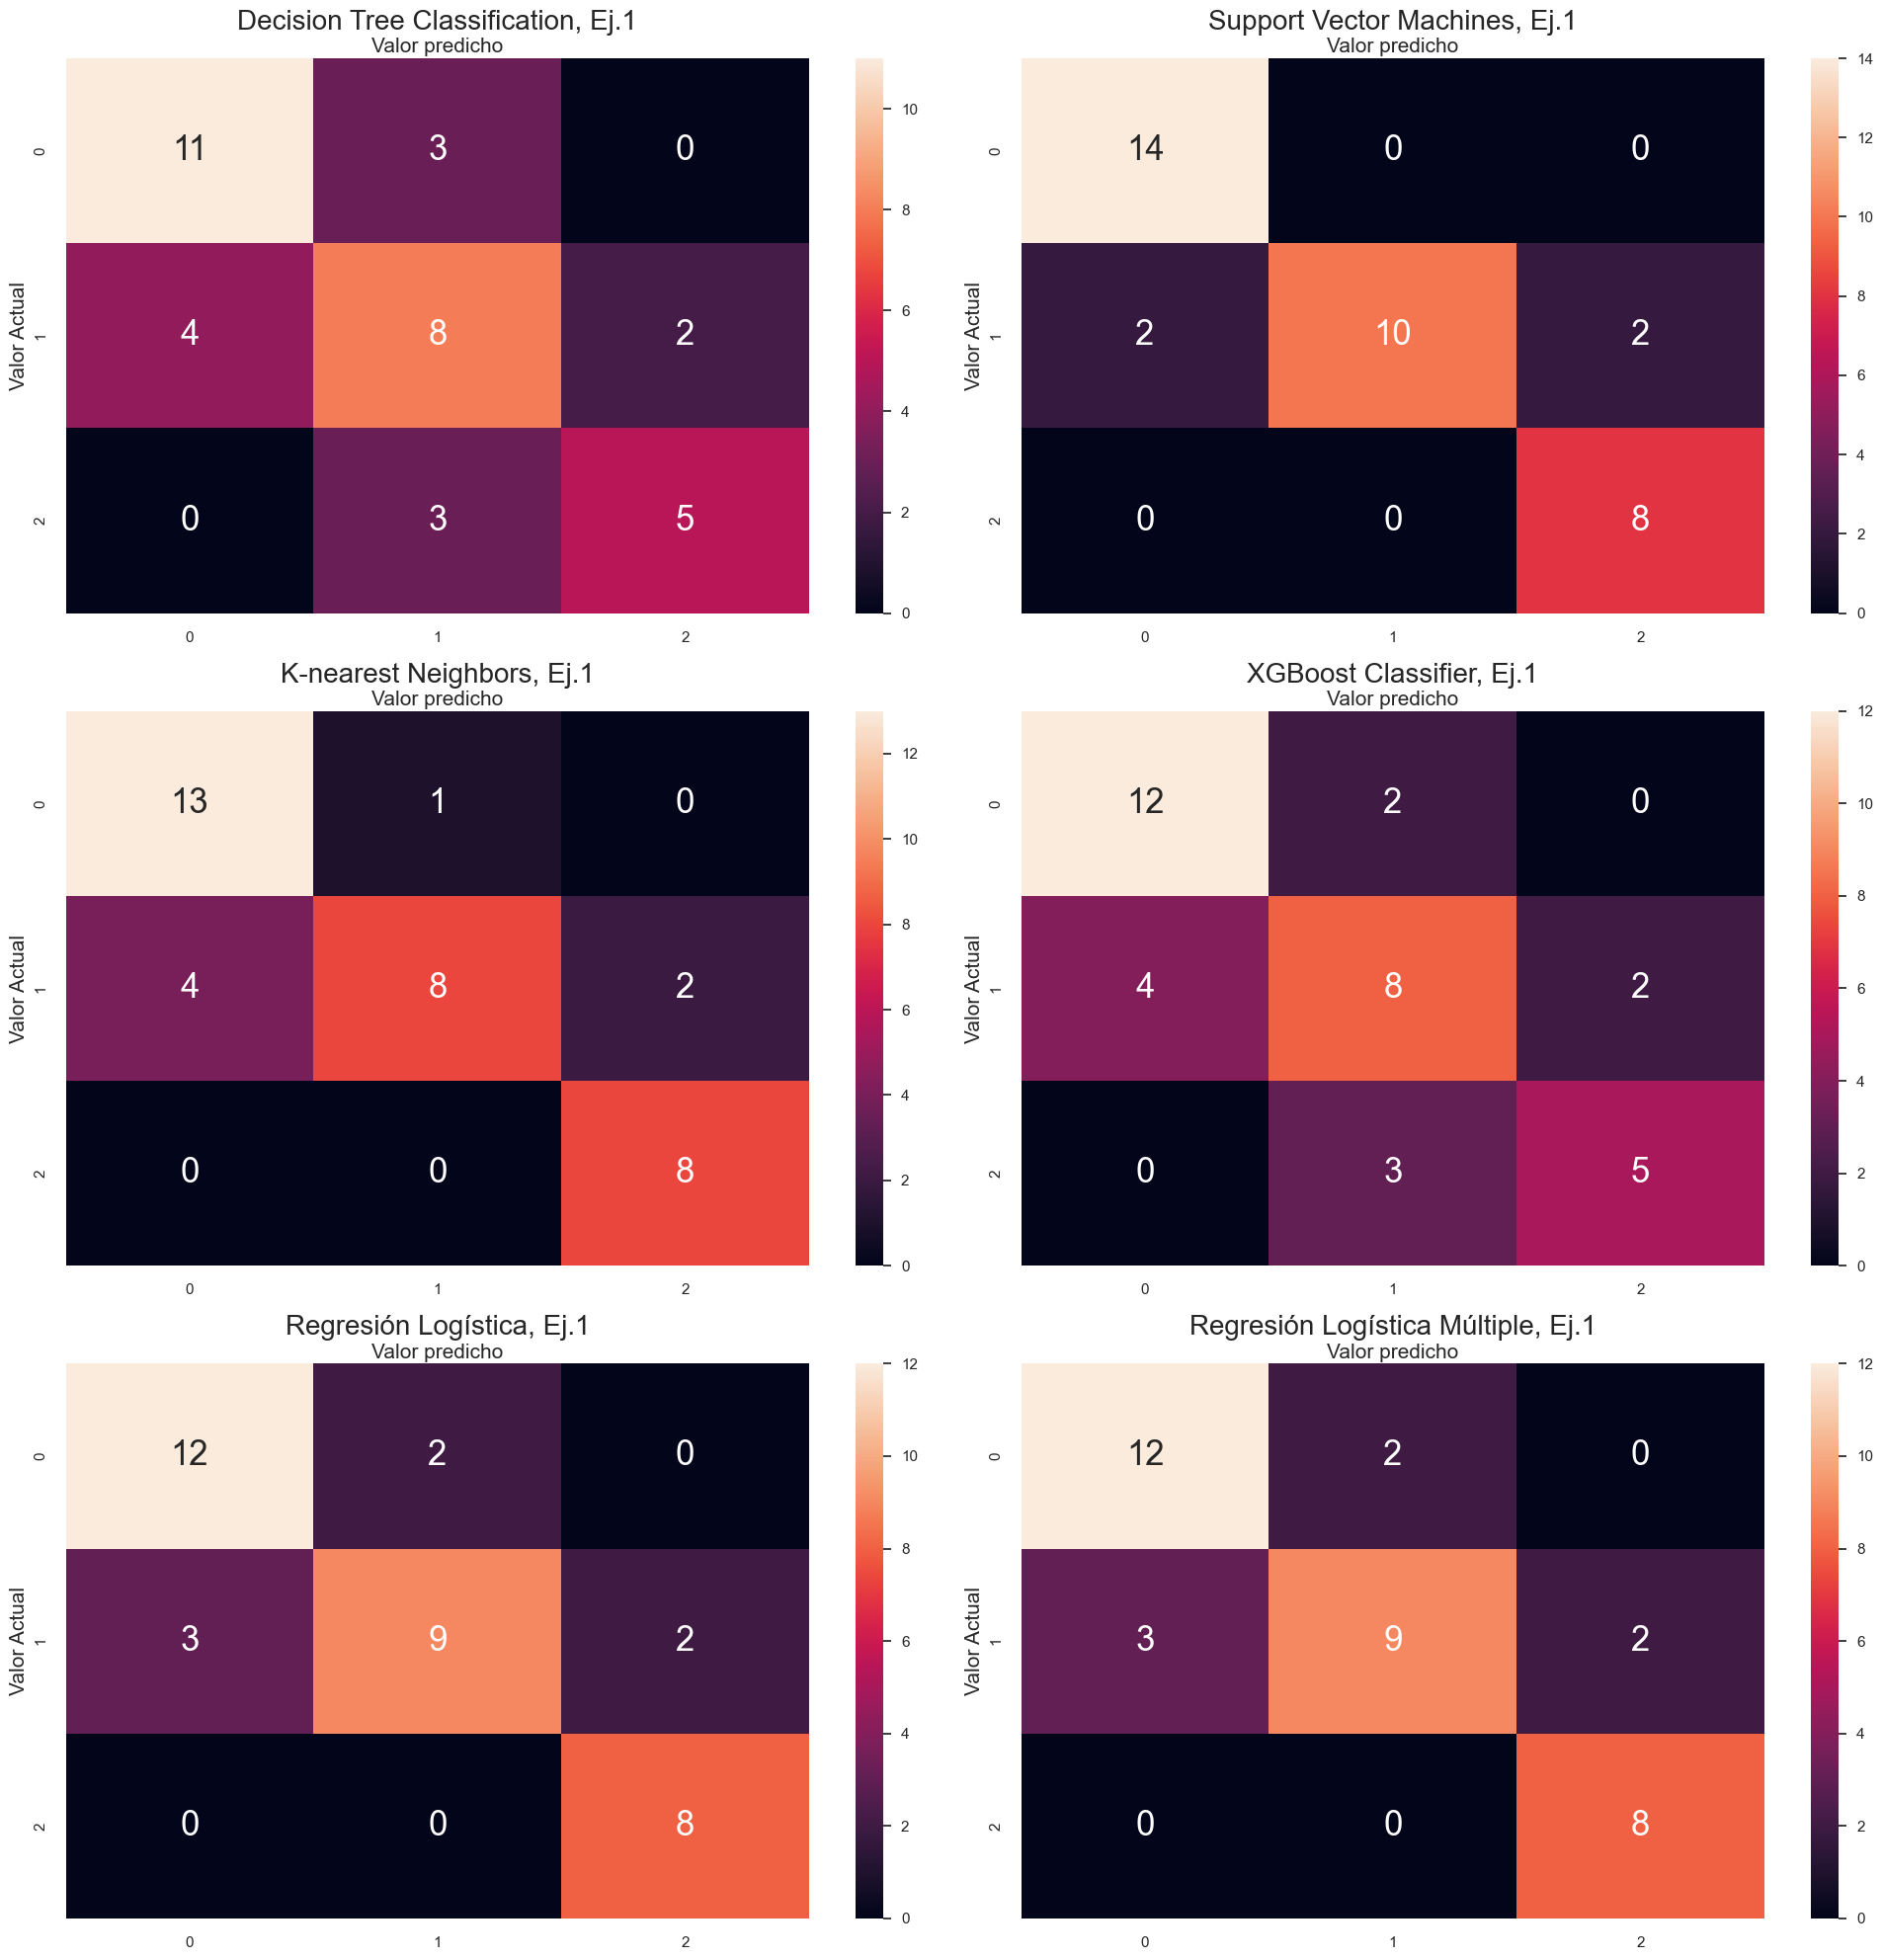

In [70]:
Setconfusion_matrix(Vtitulo,y_test,Vprediciones)

+ **2.4 Gráfica de curva ROC.**



Gráfica de curva ROC:
 


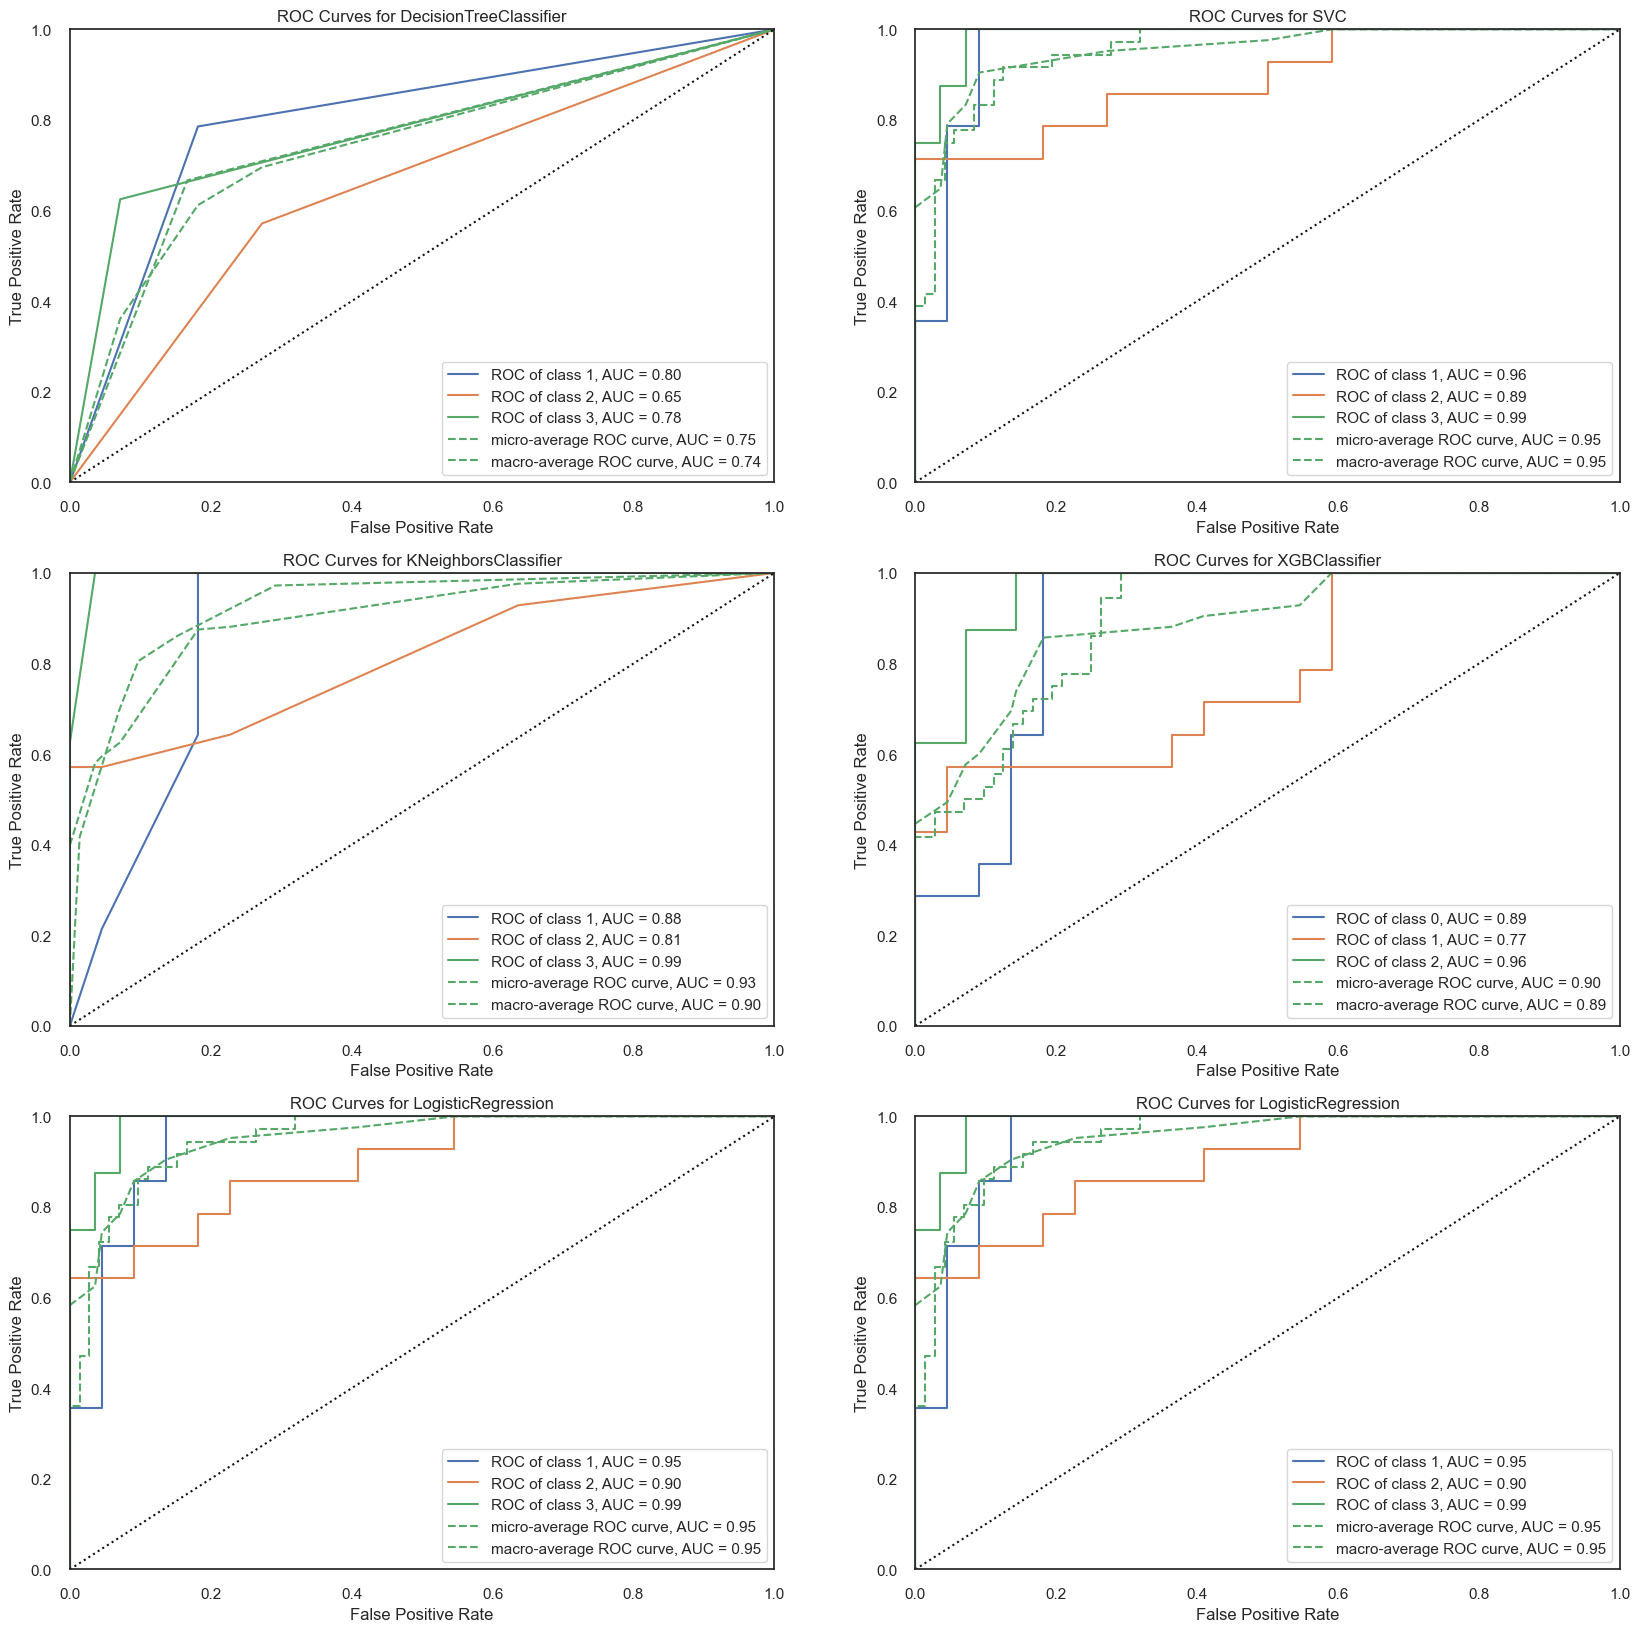

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=LogisticRegression(multi_class='multinomial',
                                    solver='newton-cg'),
       is_fitted=True)

In [71]:
Set_ROC_curve(Vtitulo,Vmodelo,X_train, y_train, X_test, y_test)

************

### <font color='#d50283'>- Exercici 3</font>
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

+ **Funciones utilizadas en este ejercicio:**

In [72]:
def Modelo_grid_search(modelo,X,y,parametros,nfolds,score):
    #create a dictionary of all values we want to test
    param_grid = parametros #{ 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    estimador=modelo
    #use gridsearch to test all values
    estimador_gscv = GridSearchCV(estimador, 
                                  param_grid, 
                                  scoring=score,
                                  #fit_params=fit_params,
                                  cv=nfolds)
    #fit model to data
    estimador_gscv.fit(X, y)
    return estimador_gscv.best_params_

Vamos a utilizar los dos modelos que en la tabla de métricas han tenido un peor ***accuracy***.  Estudiamos los diferentes parámetros para intentar mejorar el accuracy.

+ **3.1 Decision Tree Classification**    
<font color='##08a22a'></font>[Explicación.](<https://www.youtube.com/watch?v=ovwsSm6GK8w>)


+ **3.1.1 Decidir el corte a través de calculos de entropía y gini.**

In [73]:
# Decidir el corte a través de calculos de entropía y gini
# Optimización del rendimiento del árbol de decisiones
# Create Decision Tree classifer object

clf_dtc3 = DecisionTreeClassifier(criterion="gini", max_depth=5)
#clf_dtc3 = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf_dtc3 = clf_dtc3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc3 = clf_dtc3.predict(X_test)



In [74]:
Vprediciones.append(y_pred_dtc3)


dfvalor=[]
dfvalor=metricas('Decision Tree Classification, Ej.3 gini',clf_dtc3,X_test,X_train,dfvalor,y_train,y_test,y_pred_dtc3)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(clf_dtc3)
Vtitulo.append('Decision Tree Classification, Ej.3 gini')

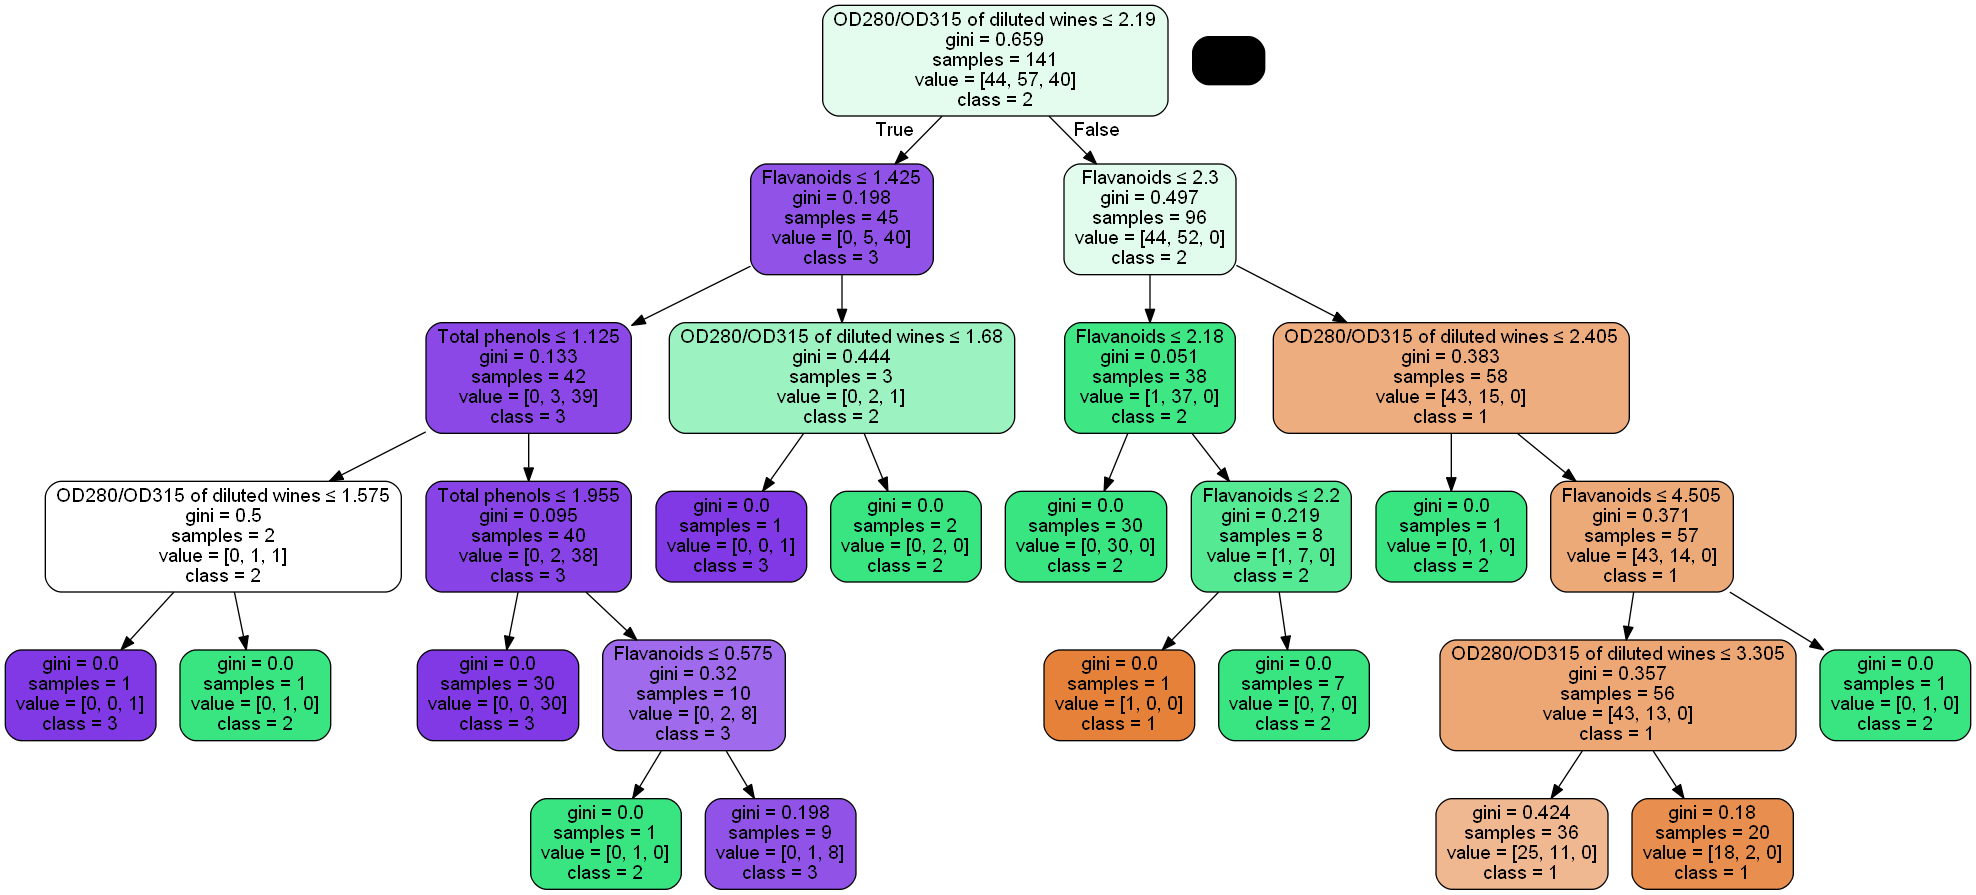

In [75]:
#Visualización de árboles de decisión
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from six import StringIO
# código de abajo para que sepa donde esta el ejecutable graphviz, da error si lo suprimimos la linea
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = StringIO()
export_graphviz(clf_dtc3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vino2.png')
Image(graph.create_png())

+ **3.1.2 Feature importance.**      
Los árboles nos permiten definir una manera de medir la importancia de los features (o Feature Importances) basado en la ganancia de información obtenida cada vez que se utilizo cada feature para hacer un split. Para esto, una vez entrando el árbol, el método que utilizaremos es:



In [76]:
# calculando las 3 feature importances mas altas
importances = pd.Series(clf_dtc3.feature_importances_).sort_values(ascending=False)[:3]
importances

1    0.565773
0    0.415239
2    0.018989
dtype: float64

In [77]:
np.array(features)

array(['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols'],
      dtype='<U28')

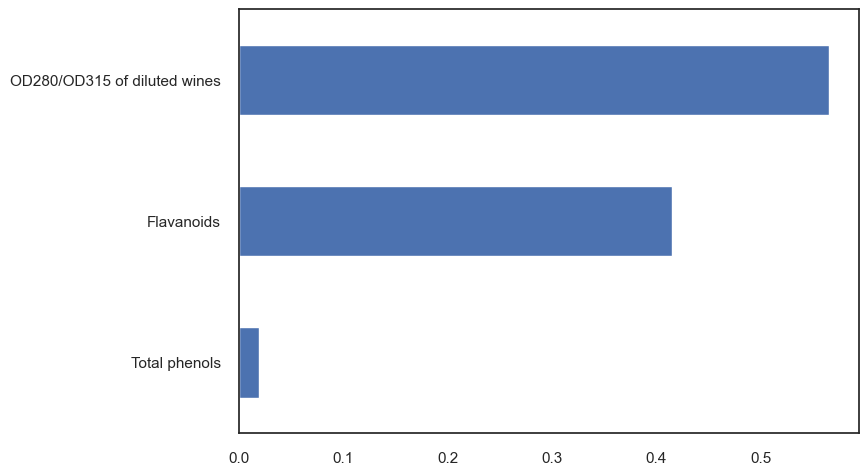

In [78]:
f5_names = list(pd.Series(np.array(features))[importances.index.to_list()])
fig, ax = plt.subplots()
importances.plot.barh(ax=ax)
ax.set_yticklabels(f5_names)
ax.invert_yaxis()

+ **3.1.3 Desbalance de clases.**      
Como este dataset tiene un desbalance de clases, podemoss incluir eso en el modelo utilizando el parámetro class_weight que nos permite manejar directamente el desbalance.  
El atributo **Total phenos**, tiene menos elementos en proporción a los otros dos atributos. Probamos si mejora **class_weight="balanced"**.

In [79]:
clf_dtc4  = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1,
                               min_samples_split=2, ccp_alpha=0, class_weight="balanced")
clf_dtc4.fit(X_train, y_train)

y_pred_dtc4=clf_dtc4.predict(X_test)

#accuracy_score(y_train, clf_dtc4.predict(X_train))

In [80]:
Vprediciones.append(y_pred_dtc4)
dfvalor=[]
dfvalor=metricas('Decision Tree Classification, Ej.3 Balanced',clf_dtc4,X_test,X_train,dfvalor,y_train,y_test,y_pred_dtc4)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(clf_dtc4)
Vtitulo.append('Decision Tree Classification, Ej.3 Balanced')

+ **3.1.4 Overfitting: profundidad del árbol y post-pruning.**    
Dado que los árboles son modelos que tienden a overfittear tenemos que recurrir a distintas técnicas para mitigar este problema. Veamos primero el efecto de la profundidad del árbol en el trade-off sesgo varianza.

In [81]:
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0, class_weight="balanced")
    arbol.fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

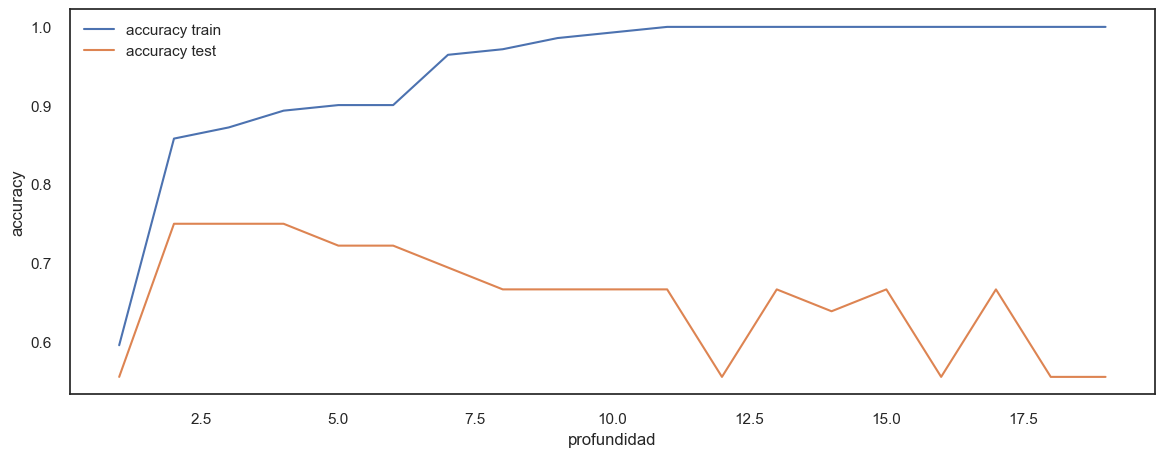

In [82]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

In [83]:
# veamos que pasa con un árbol sin corte de profundidad
np.random.seed(2021)
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0)
arbol.fit(X_train, y_train)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Accuracy en entrenamiento: %f' % accuracy_score(y_train,arbol.predict(X_train)))
print('Accuracy en test: %f' % accuracy_score(y_test,arbol.predict(X_test)))

Accuracy en entrenamiento: 1.000000
Accuracy en test: 0.638889


Una técnica que nos permite mitigar el overfitting es lo que se conoce como post-prunning. El objetivo de esta técnica es *podar* el árbol entrenado, penalizando de alguna forma los árboles más complejos. El algortimo de poda que tenemos implementado en Scikit-Learn es el [Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning). El hiperparámetro que controla esta penalización es ccp_alpha$\geq 0$, cuando este hiperparámetro es 0, no realizamos ningún tipo de poda, y a medida que aumentamos dicho hiperparámetro penalizaremos más fuertemente la cantidad de nodos terminales del árbol.

In [84]:
# veamos que pasa con un árbol con corte de profundidad
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.01)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Accuracy en entrenamiento: %f' % accuracy_score(y_train,arbol.predict(X_train)))
print('Accuracy en test: %f' % accuracy_score(y_test,y_pred_arbol))

Accuracy en entrenamiento: 0.921986
Accuracy en test: 0.722222


In [85]:
Vprediciones.append(y_pred_arbol)

dfvalor=[]
dfvalor=metricas('Decision Tree Classification, Ej.3 ccp_alpha',arbol,X_test,X_train,dfvalor,y_train,y_test,y_pred_arbol)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(arbol)
Vtitulo.append('Decision Tree Classification, Ej.3 ccp_alpha')

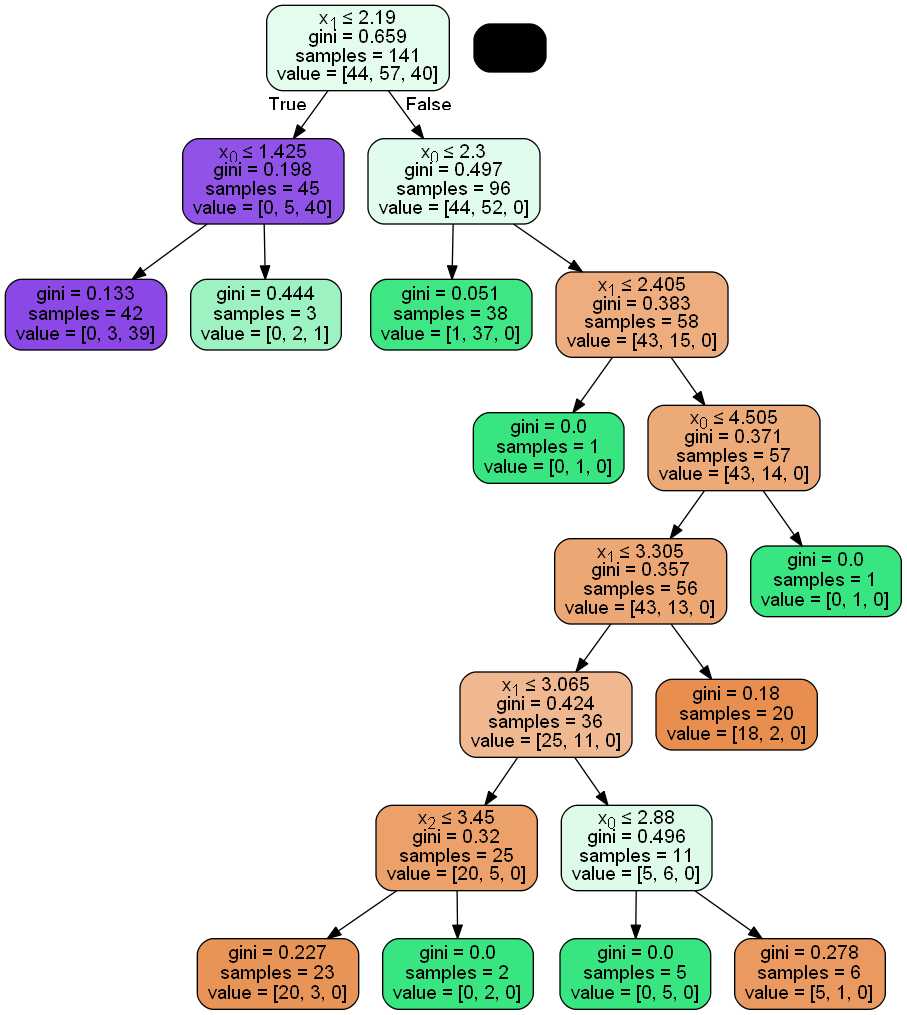

In [86]:
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

+ **3.1.5 GridSearchCV.**    
Búsqueda exhaustiva sobre valores de parámetros específicos para un estimador.
Los miembros importantes están en forma, predicen.
GridSearchCV implementa un método de "ajuste" y "puntuación". También implementa “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” y “inverse_transform” si están implementados en el estimador utilizado

In [87]:
param_modelo = {'criterion': ['gini'], 
                'max_depth': np.arange(3, 15), 
                'ccp_alpha': [0.001,0.01,0.1,1],
                'min_samples_leaf': [1,2,3],
                'min_samples_split': [1,2,3],
                'class_weight': ['balanced']}

modelo=DecisionTreeClassifier()
cv=10

MejoresParam=Modelo_grid_search(modelo,X_train,y_train,param_modelo,cv,'accuracy')



In [88]:
resultado = DecisionTreeClassifier(random_state = 0, 
                                    criterion = MejoresParam['criterion'],
                                    max_depth = MejoresParam['max_depth'],
                                    ccp_alpha = MejoresParam['ccp_alpha'],
                                    min_samples_leaf = MejoresParam['min_samples_leaf'],
                                    min_samples_split = MejoresParam['min_samples_split'],
                                    class_weight = MejoresParam['class_weight']
                                  )
resultado.fit(X_train,y_train)

y_pred_resul=resultado.predict(X_test)


In [89]:
Vprediciones.append(y_pred_resul)
dfvalor=[]
dfvalor=metricas('Decision Tree Classification, Ej.3 GridSeCV',resultado,X_test,X_train,dfvalor,y_train,y_test,y_pred_resul)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(resultado)
Vtitulo.append('Decision Tree Classification, Ej.3 GridSeCV')

In [90]:
dfmetricas[dfmetricas['Tipo Clasificación'].str.contains('Decision Tree')].sort_values(['accuracy','accuracy_CVS'],ascending=False)

,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"Decision Tree Classification, Ej.3 Balanced",0.57,57.0 %,0.25,0.50,0.25,0.75,0.84 (+/- 0.13),0.74,0.75,0.73,0.85,0.80,0.62
0,"Decision Tree Classification, Ej.3 gini",0.57,57.0 %,0.25,0.50,0.25,0.75,0.79 (+/- 0.16),0.74,0.75,0.73,0.86,0.83,0.62
0,"Decision Tree Classification, Ej.3 GridSeCV",0.52,52.0 %,0.28,0.53,0.28,0.72,0.84 (+/- 0.13),0.71,0.73,0.70,0.83,0.78,0.58
0,"Decision Tree Classification, Ej.3 ccp_alpha",0.52,52.0 %,0.28,0.53,0.28,0.72,0.79 (+/- 0.17),0.71,0.73,0.71,0.82,0.79,0.57
0,"Decision Tree Classification, Ej.1",0.43,43.0 %,0.33,0.58,0.33,0.67,0.76 (+/- 0.14),0.67,0.66,0.67,0.75,0.74,0.48


Observamos una mejora solo configurando el parámetro ***criterion="gini"*** y ***class_weight="'balanced", las otra opción no ha mejorado el modelo respecto a la primera modificación.  Pero todas ellas mejoran la predicción que obteniamos en el ejercicio 1.
Sí miramos nuestra métrica utilizando cross_val_score ***'accuracy_CVS'***, obtenemos buenos resultados en todas ellas.

+ **3.2 Algoritme XGBoost**   
<font color='##08a22a'></font>[Algoritme XGBoost](<https://www.datacamp.com/tutorial/xgboost-in-python>)    
<font color='##08a22a'></font>[Video Explicativo](<https://www.youtube.com/watch?v=Ke4g4z1-_kw&list=PLISuMnTdVU-xNaAZM8H2oRGDlgxvHMCDJ&index=43J>)   
<font color='##08a22a'></font>[General Humai](<https://www.youtube.com/playlist?list=PLISuMnTdVU-xNaAZM8H2oRGDlgxvHMCDJ>)   

+ **3.2.1 Capacitación:**   
La función objetivo elegida y cualquier otro hiperparámetro de XGBoost debe especificarse en un diccionario, que por convención debe llamarse params:

Trabajaremos con los datos ya utilizados en el Ejecicio 1 (punto 1.4).    

#### Creamos el modelo: 
    
#### Obtenemos un error
        xgbclassifier python: Invalid classes inferred from unique values of `y`.  
           Expected: [0 1 2], got [1 2 3]
        
#### Solución
Modifico las caracteristicas de mi atributo dependiente tanto y_train como y_test.    
Solución web:   
(<https://stackoverflow.com/questions/72452872/valueerror-invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2>)


        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y_train2 = le.fit_transform(y_train)
        y_test2 = le.fit_transform(y_test)
    
        

+ **3.2.2 GridSearchCV**   


In [91]:


modelo=XGBestimator = XGBClassifier(
                                    objective= 'multi:softprob',
                                    booster= 'gbtree',
                                    nthread=4,
                                    seed=42
                                    )
param_modelo = {
    'base_score': [0.5,1.0],
    #'booster': ['gbtree'],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
                }
#controlar el overfitting
# no tenemos el parámetro en está versión

fit_params ={'early_stopping_rounds': 10,
             'eval_metrics':'logloss',
             'eval_set':[(X_train,y_train2)]
            }
cv=10
MejoresParam=Modelo_grid_search(modelo,X_train,y_train2,param_modelo,cv,'accuracy')




In [92]:
resultadoXGB = XGBClassifier(objective= 'multi:softprob',
                            nthread=4,
                            seed=42,
                            max_depth = MejoresParam['max_depth'],
                            n_estimators = MejoresParam['n_estimators'],
                            learning_rate = MejoresParam['learning_rate']
                          )

resultadoXGB.fit(X_train,y_train2)

y_pred_resul=resultadoXGB.predict(X_test)

In [93]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,Probabilidad,df,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test
Vprediciones.append(y_pred_resul)
dfvalor=[]
dfvalor=metricas('XGBoost Classifier, Ej.3 GridSeCV',resultadoXGB,X_test,X_train,dfvalor,y_train2,y_test2,y_pred_resul)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(resultadoXGB)
Vtitulo.append('XGBoost Classifier, Ej.3 GridSeCV')

+ **3.2.3 Recursive Feature Elimination Cross Validation (RFECV).**   


In [94]:
selector =RFECV ( estimator = resultadoXGB,
                step=1,
                min_features_to_select=2,
                cv=5,
                scoring='accuracy',
                verbose=False)

In [95]:
selector.fit(X_train,y_train2)

y_pred_selector=selector.predict(X_test)

In [96]:
Vprediciones.append(y_pred_selector)
dfvalor=[]
dfvalor=metricas('XGBoost Classifier, Ej.3 RFECV',selector,X_test,X_train,dfvalor,y_train2,y_test2,y_pred_selector)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(selector)
Vtitulo.append('XGBoost Classifier, Ej.3 RFECV')

In [97]:
dfmetricas[dfmetricas['Tipo Clasificación'].str.contains('XGBoost')].sort_values(['accuracy','accuracy_CVS'],ascending=False)

,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"XGBoost Classifier, Ej.3 RFECV",0.57,57.0 %,0.25,0.50,0.25,0.75,0.81 (+/- 0.03),0.74,0.75,0.73,0.88,0.85,0.62
0,"XGBoost Classifier, Ej.3 GridSeCV",0.52,52.0 %,0.28,0.53,0.28,0.72,0.81 (+/- 0.03),0.71,0.73,0.70,0.88,0.85,0.58
0,"XGBoost Classifier, Ej.1",0.48,48.0 %,0.31,0.55,0.31,0.69,0.82 (+/- 0.12),0.69,0.68,0.69,0.90,0.88,0.53


************

### <font color='#d50283'>- Exercici 4</font>
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [98]:
df00 = data.copy()
features = ['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols']

target = ['Class Distribution']

#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7.
#una distribución normal

x = df00.loc[:, features]

#target (Vamos a utilizar el estimador de XGBoost)
y = le.fit_transform(df00.loc[:, ['Class Distribution']].values)
   


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, 
                                                    random_state = Semilla)


+ **Utilizamos el estimador ***selector*** del pto.3.2.3.**

In [99]:
# fit el modelo
print("\nResultado:\n ")

selector.fit(X_train,y_train)

scores_XGB = cross_val_score(selector, X_train, y_train, cv=5) 
print("DataSet Train Accuracy: %0.2f (+/- %0.2f)" % (scores_XGB.mean(), scores_XGB.std() * 2))


selector.fit(X_test,y_test)

scores_XGB = cross_val_score(selector, X_test, y_test, cv=5) 
print("DataSet Test Accuracy: %0.2f (+/- %0.2f)" % (scores_XGB.mean(), scores_XGB.std() * 2))

scores_XGB = cross_val_score(selector, x, y, cv=5) 
print("DataSet Original Accuracy: %0.2f (+/- %0.2f)" % (scores_XGB.mean(), scores_XGB.std() * 2))


Resultado:
 
DataSet Train Accuracy: 0.81 (+/- 0.03)
DataSet Test Accuracy: 0.89 (+/- 0.26)
DataSet Original Accuracy: 0.81 (+/- 0.15)


+ **Otras métricas entre los metodos utilizados en el ejercicio 1 y 3.**

In [100]:
df=dfmetricas.query('(`Tipo Clasificación`.str.contains("Tree") and (`Tipo Clasificación`.str.contains("Ej.1") or `Tipo Clasificación`.str.contains("Ej.3"))) or (`Tipo Clasificación`.str.contains("XGBoost") and (`Tipo Clasificación`.str.contains("Ej.1") or `Tipo Clasificación`.str.contains("Ej.3")))')   
df=df.sort_values(by=['Tipo Clasificación'])
df

,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"Decision Tree Classification, Ej.1",0.43,43.0 %,0.33,0.58,0.33,0.67,0.76 (+/- 0.14),0.67,0.66,0.67,0.75,0.74,0.48
0,"Decision Tree Classification, Ej.3 Balanced",0.57,57.0 %,0.25,0.50,0.25,0.75,0.84 (+/- 0.13),0.74,0.75,0.73,0.85,0.80,0.62
0,"Decision Tree Classification, Ej.3 GridSeCV",0.52,52.0 %,0.28,0.53,0.28,0.72,0.84 (+/- 0.13),0.71,0.73,0.70,0.83,0.78,0.58
0,"Decision Tree Classification, Ej.3 ccp_alpha",0.52,52.0 %,0.28,0.53,0.28,0.72,0.79 (+/- 0.17),0.71,0.73,0.71,0.82,0.79,0.57
0,"Decision Tree Classification, Ej.3 gini",0.57,57.0 %,0.25,0.50,0.25,0.75,0.79 (+/- 0.16),0.74,0.75,0.73,0.86,0.83,0.62
0,"XGBoost Classifier, Ej.1",0.48,48.0 %,0.31,0.55,0.31,0.69,0.82 (+/- 0.12),0.69,0.68,0.69,0.90,0.88,0.53
0,"XGBoost Classifier, Ej.3 GridSeCV",0.52,52.0 %,0.28,0.53,0.28,0.72,0.81 (+/- 0.03),0.71,0.73,0.70,0.88,0.85,0.58
0,"XGBoost Classifier, Ej.3 RFECV",0.57,57.0 %,0.25,0.50,0.25,0.75,0.81 (+/- 0.03),0.74,0.75,0.73,0.88,0.85,0.62


************

### <font color='#d50283'>- Exercici 5</font>
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

+ **Funciones utilizadas en este ejercicio:**

In [101]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            print(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df

Apliquemos la reducción de la dimensionalidad para reducir los datos a 2 dimensiones. Utilizaremos 2 funciones diferentes (PCA y TSNE) para comprobar cuál de ellas produce mejores resultados.

+ **5.1 Reducción de la Dimensionalidad (PCA).**   
<font color='##08a22a'></font>[**PCA**](<https://www.cienciadedatos.net/documentos/py19-pca-python.html>)   
<font color='##08a22a'></font>[**Ayuda**](<https://www.alldatascience.com/classification/wine-dataset-analysis-with-python/>)

In [102]:
#Import standardscaler
from sklearn.preprocessing import StandardScaler

#Preparamos x e y
x = data.loc[:,data.columns != 'Class Distribution'].values
y = data.loc[:,['Class Distribution']].values

#Escalamos los datos
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(y)

# Creamos el PCA.
pca = PCA(n_components=2)

#Run PCA.
pComp=pca.fit_transform(x)

df_PCA = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

#df_PCA.head()

In [103]:
# añadimos al dataset creado el atributo target

dff_PCA = pd.concat([df_PCA, data[['Class Distribution']]], axis = 1)
dff_PCA.head()

,PC 1,PC 2,Class Distribution
0,2.230243,0.302313,1
1,2.531922,-1.062257,1
2,3.754677,-2.805309,1
3,1.020131,-0.888380,1
4,3.049199,-2.170007,1


+ **5.2 Reducción de la Dimensionalidad (TSNE).**   
<font color='##08a22a'></font>[**TSNE**](<https://www.themachinelearners.com/tsne/>)

In [104]:
#Use same variables as in the previous point, they are already standarized
# Create TSNE object.
X_embedded = TSNE(n_components=2,perplexity=15,random_state=42).fit_transform(x)

df_TSNE = pd.DataFrame(data = X_embedded
             , columns = ['PC 1', 'PC 2'])

#df_TSNE.head()

In [105]:
# Join the target variable

dff_TSNE = pd.concat([df_TSNE, data[['Class Distribution']]], axis = 1)
dff_TSNE.head()

,PC 1,PC 2,Class Distribution
0,10.846756,-19.263935,1
1,9.489678,-28.887421,1
2,18.384375,-27.825453,1
3,0.991395,-21.245173,1
4,16.276287,-29.568501,1


+ **5.3 Comparativa de Gráficas PCA y TSNE**


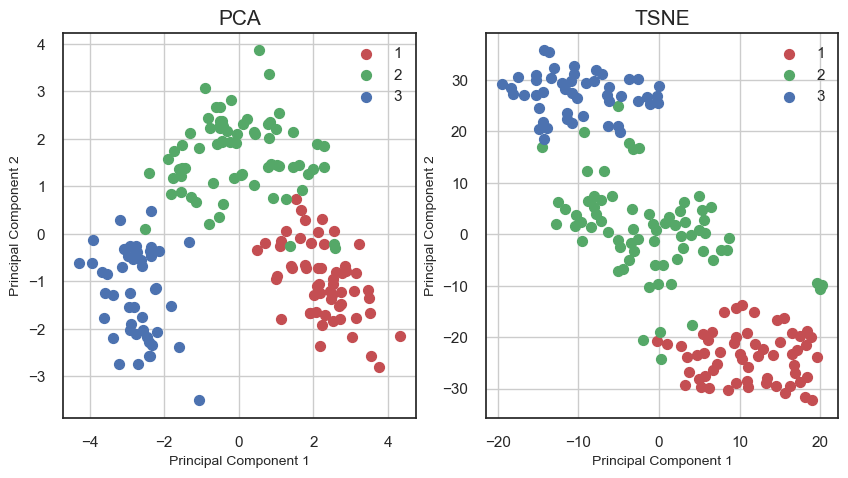

In [106]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize = (10,5))
#ax = fig.add_subplot(1,1,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 10)
ax1.set_ylabel('Principal Component 2', fontsize = 10)
ax1.set_title('PCA', fontsize = 15)
ax2.set_xlabel('Principal Component 1', fontsize = 10)
ax2.set_ylabel('Principal Component 2', fontsize = 10)
ax2.set_title('TSNE', fontsize = 15)
targets = [1, 2, 3]
colors1 = ['r', 'g', 'b']
for target, color in zip(targets,colors1):
        indicesToKeep = dff_PCA['Class Distribution'] == target
        ax1.scatter(dff_PCA.loc[indicesToKeep, 'PC 1']
                   , dff_PCA.loc[indicesToKeep, 'PC 2']
                   , c = color
                   , s = 50)

for target, color in zip(targets,colors1):
        indicesToKeep = dff_TSNE['Class Distribution'] == target
        ax2.scatter(dff_TSNE.loc[indicesToKeep, 'PC 1']
                   , dff_TSNE.loc[indicesToKeep, 'PC 2']
                   , c = color
                   , s = 50)
ax1.legend(targets)
ax1.grid()
ax2.legend(targets)
ax2.grid()

Podemos observar una buena separación de nuestro atributo dependiente (Class Distribution) en ambos metodos.  A simple vista no sabría decir cual de los dos tiene mejor diferenciado las clases.  En PCA, la clase 2(Verde), tiene menos elementos mezclados en las otras dos clases, en la zona 3 (Azul) = 1 elemento, en la zona 1 (Roja) = 3.  En cuanto al otro método se mezcla un poco más.   
El método PCA explica la varianza de los datos cuando se proyectan sobre un eje y busca los componentes que explican la mayor varianza, mientras que TSNE utiliza distribuciones de probabilidad para buscar una similitud entre el espacio de dimensión reducido y el espacio de dimensión original.


<font color='##08a22a'></font>[Explicación PCA](<https://vitalflux.com/pca-explained-variance-concept-python-example/?utm_content=cmp-true>)   
<font color='##08a22a'></font>[Explicación TSNE](<https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a>)   


+ **5.4 Normalizamos los datos del DataSet Original.**

Normalizamos los datos de los atributos para llevar los valores de los mismos a una misma escala, de tal forma que los valores más altos de algunos atributos no se impongan a los más pequeños de otros atributos.

<font color='##08a22a'></font>[DataFrameMapper](<https://dunyaoguz.github.io/my-blog/dataframemapper.html>)

In [107]:
# Normalizar
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(data.columns, StandardScaler())])
scaled_features = mapper.fit_transform(data.copy(), 4)
df_mapper= pd.DataFrame(scaled_features, index=data.index, columns=data.columns)
df_mapper.head(2)

,Class Distribution,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998


In [108]:
print(Style.BRIGHT +'Estadística descriptiva del Wine recognition dataset:'+Style.RESET_ALL)
#data.describe().round(2).T
EstaDescrip(df_mapper[features])

Estadística descriptiva del Wine recognition dataset:


,count,mean,median,std,min,25%,50%,75%,max
Flavanoids,177.0,1.605746e-16,0.107000,1.002837,-1.690491,-0.826892,0.107000,0.840055,3.069345
OD280/OD315 of diluted wines,177.0,7.225858e-16,0.249899,1.002837,-1.897707,-0.959018,0.249899,0.804579,1.985052
Total phenols,177.0,-2.810056e-16,0.092430,1.002837,-2.100648,-0.884050,0.092430,0.812784,2.541633


In [109]:
#print(Style.BRIGHT +'\nPruebas de Contraste de Normalidad:\n '+Style.RESET_ALL)
#print('\n- Distribución de los atributos independientes\n ')
#crearhistograma(df_mapper,atributos)
#sns.set_theme(style="white", rc=None)

In [110]:
# Tienen más coeficiente de relación con uno de los atributos
#corrdat = df_mapper.corr()
#threshold = 0.7
#corr_value = getCorrelatedFeature(corrdat['Class Distribution'],threshold)

In [111]:
# corr matrix 
#CD = df_mapper[corr_value.index]
#plt.figure(figsize=(8,4))
#colormap = plt.cm.YlGnBu

#matrix = np.triu(CD.astype(float).corr())
#plt.title('Pearson Correlation of features', y=1, size = 10)
#sns.heatmap(CD.astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = colormap, 
#          linecolor = 'white', annot = True, mask = matrix)
#plt.show()

In [112]:
#sns.pairplot(CD,hue='Class Distribution', palette='deep')

In [113]:
#print('\n- Prueba Shapiro-Wilk:\n ')
#crearShapiro(CD,CD.columns)
#sns.set_theme(style="white", rc=None)

In [114]:
#print('\n- Gráfica Quantile-Quantile:\n ')
#crearquantile(CD,CD.columns)
#sns.set_theme(style="white", rc=None)

+ **5.5 Creamos Train/Test, DataSet Normalizado.**   
Continuamos el estudio con los misnmos atributos dependientes utilizados a lo largo
de todo el ejercicio, volvemos a utilizar el modelo XGBclassifier.



In [115]:
df00 = df_mapper.copy()
features = ['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols']

target = ['Class Distribution']

#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7.
#una distribución normal

x = df00.loc[:, features]

#target (Vamios a utilizar el estimador de XGBoost)
y = le.fit_transform(df00.loc[:, ['Class Distribution']].values)

x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size =0.2, 
                                                    random_state = Semilla)




In [116]:


modelo_normalizado=XGBestimator = XGBClassifier(
                                    objective= 'multi:softprob',
                                    booster= 'gbtree',
                                    nthread=4,
                                    seed=42
                                    )
param_modelo = {
    'base_score': [0.5,1.0],
    #'booster': ['gbtree'],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
                }
cv=10
MejoresParam=Modelo_grid_search(modelo_normalizado,x_train,Y_train,param_modelo,cv,'accuracy')



In [117]:
normalizadoXGB = XGBClassifier(objective= 'multi:softprob',
                            nthread=4,
                            seed=42,
                            max_depth = MejoresParam['max_depth'],
                            n_estimators = MejoresParam['n_estimators'],
                            learning_rate = MejoresParam['learning_rate']
                          )

normalizadoXGB.fit(x_train,Y_train)

y_pred_normal=normalizadoXGB.predict(x_test)

In [118]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,test,train,df,ytrain,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test
Vprediciones.append(y_pred_normal)
dfvalor=[]
dfvalor=metricas('XGBoost Classifier, Ej.5 GridSeCV',normalizadoXGB,x_test,x_train,dfvalor,Y_train,Y_test,y_pred_normal)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(resultadoXGB)
Vtitulo.append('XGBoost Classifier, Ej.5 GridSeCV')

In [119]:
dfmetricas[dfmetricas['Tipo Clasificación'].str.contains('XGBoost')].sort_values(['accuracy','accuracy_CVS'],ascending=False)

,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"XGBoost Classifier, Ej.3 RFECV",0.57,57.0 %,0.25,0.50,0.25,0.75,0.81 (+/- 0.03),0.74,0.75,0.73,0.88,0.85,0.62
0,"XGBoost Classifier, Ej.3 GridSeCV",0.52,52.0 %,0.28,0.53,0.28,0.72,0.81 (+/- 0.03),0.71,0.73,0.70,0.88,0.85,0.58
0,"XGBoost Classifier, Ej.5 GridSeCV",0.52,52.0 %,0.28,0.53,0.28,0.72,0.81 (+/- 0.03),0.71,0.73,0.70,0.88,0.85,0.58
0,"XGBoost Classifier, Ej.1",0.48,48.0 %,0.31,0.55,0.31,0.69,0.82 (+/- 0.12),0.69,0.68,0.69,0.90,0.88,0.53


Con la normalización de los datos no hemos tenido mejoria.

+ **5.6 Reducción de la Dimensionalidad (PCA).**   
Probamos la reducción de la dimensionalidad, volvemos a utilizar el modelo XGBclassifier.



In [120]:
df00 = dff_PCA.copy()
features = ['PC 1', 'PC 2']

target = ['Class Distribution']

#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7.
#una distribución normal

x = df00.loc[:, features]

#target (Vamios a utilizar el estimador de XGBoost)
y = le.fit_transform(df00.loc[:, ['Class Distribution']].values)
   
# Creamos el modelo


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, 
                                                    random_state = Semilla)



In [121]:


modelo_PCA=XGBestimator = XGBClassifier(
                                    objective= 'multi:softprob',
                                    booster= 'gbtree',
                                    nthread=4,
                                    seed=42
                                    )
param_modelo = {
    'base_score': [0.5,1.0],
    #'booster': ['gbtree'],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
                }
cv=10
MejoresParam=Modelo_grid_search(modelo_PCA,X_train,y_train,param_modelo,cv,'accuracy')


In [122]:
modelo_PCA= XGBClassifier(objective= 'multi:softprob',
                            nthread=4,
                            seed=42,
                            max_depth = MejoresParam['max_depth'],
                            n_estimators = MejoresParam['n_estimators'],
                            learning_rate = MejoresParam['learning_rate']
                          )

modelo_PCA.fit(X_train,y_train)

y_pred_PCA=modelo_PCA.predict(X_test)

In [123]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,test,train,df,ytrain,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test
Vprediciones.append(y_pred_PCA)
dfvalor=[]
dfvalor=metricas('PCA, Ej.5 GridSeCV',modelo_PCA,X_test,X_train,dfvalor,y_train,y_test,y_pred_PCA)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(resultadoXGB)
Vtitulo.append('PCA, Ej.5 GridSeCV')

+ **5.7 Reducción de la Dimensionalidad (TSNE).**   
Probamos la reducción de la dimensionalidad, volvemos a utilizar el modelo XGBclassifier.


In [124]:
df00 = dff_TSNE.copy()
features = ['PC 1', 'PC 2']

target = ['Class Distribution']

#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7.
#una distribución normal

x = df00.loc[:, features]

#target (Vamios a utilizar el estimador de XGBoost)
y = le.fit_transform(df00.loc[:, ['Class Distribution']].values)
   


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, 
                                                    random_state = Semilla)


In [125]:


modelo_TSNE=XGBestimator = XGBClassifier(
                                    objective= 'multi:softprob',
                                    booster= 'gbtree',
                                    nthread=4,
                                    seed=42
                                    )
param_modelo = {
    'base_score': [0.5,1.0],
    #'booster': ['gbtree'],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
                }
cv=10
MejoresParam=Modelo_grid_search(modelo_TSNE,X_train,y_train,param_modelo,cv,'accuracy')


In [126]:
modelo_TSNE= XGBClassifier(objective= 'multi:softprob',
                            nthread=4,
                            seed=42,
                            max_depth = MejoresParam['max_depth'],
                            n_estimators = MejoresParam['n_estimators'],
                            learning_rate = MejoresParam['learning_rate']
                          )

modelo_TSNE.fit(X_train,y_train)

y_pred_TSNE=modelo_TSNE.predict(X_test)

In [127]:
# Guardar Métricas de los diferentes modelos
# parámetros a pasar a la funcion def metricas(titulo,modelo,test,train,df,ytrain,ytest,prediccion):
# los utilizamos para calcular ROC AUC:
#  modelo que estamos trabajando
#  Probabilidad = X_test
Vprediciones.append(y_pred_PCA)
dfvalor=[]
dfvalor=metricas('TSNE, Ej.5 GridSeCV',modelo_TSNE,X_test,X_train,dfvalor,y_train,y_test,y_pred_TSNE)
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','R²','% R²','mse','rmse','mae','accuracy','accuracy_CVS','precision','recall','f1_score','ROC AUC micro','ROC AUC macro','Cohen k']))
Vmodelo.append(resultadoXGB)
Vtitulo.append('TSNE, Ej.5 GridSeCV')

In [128]:
dfmetricas[dfmetricas['Tipo Clasificación'].str.contains('Ej.5')].sort_values(['accuracy','accuracy_CVS'],ascending=False)

,Tipo Clasificación,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,ROC AUC micro,ROC AUC macro,Cohen k
0,"PCA, Ej.5 GridSeCV",0.90,90.0 %,0.06,0.24,0.06,0.94,0.96 (+/- 0.05),0.94,0.95,0.94,0.99,0.99,0.91
0,"TSNE, Ej.5 GridSeCV",0.81,81.0 %,0.11,0.33,0.11,0.89,0.98 (+/- 0.03),0.88,0.90,0.88,0.95,0.92,0.83
0,"XGBoost Classifier, Ej.5 GridSeCV",0.52,52.0 %,0.28,0.53,0.28,0.72,0.81 (+/- 0.03),0.71,0.73,0.70,0.88,0.85,0.58


Con la reducción de la dimensionalidad el resultado es muy positivo. El metodo utilizado XGBClassifier, observo que es un poco lento cuando aplicamos la busqueda de los mejores parámetros con gridsearchcv.  ? para seguir estudiando.

************

In [ ]:
### <font color='#d50283'>Bibliográfia utilizada</font>

- <font color='##08a22a'>*Información del Sprint 07.*</font>
